# Môn: Lập trình cho Khoa học dữ liệu

**Đồ án cuối kỳ**
______________

**Nhóm 17 - Thông tin thành viên:**

| Nhóm | Họ và Tên | MSSV | Gitthub
|:-:|:-|:-:|:-:
| 17 | Trần Hữu Chí Bảo | 18120288 | https://github.com/baocl18ctt2
| 17 | Trần Xuân Quý | 18120231 |  https://github.com/XQuyTran


# Import thư viện

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats 
import warnings
warnings.filterwarnings("ignore")

# Thu thập dữ liệu

- Tập dữ liệu được sử dụng trong đồ án của nhóm có chủ đề về các yếu tố liên quan và/hoặc có thể gây ảnh hưởng đếntuổi thọ trung bình của người dân ở các quốc gia trên thế giới. Tập dữ liệu này được thu thập và đăng tải trên Kaggle bởi người dùng MMattson với giấy phép Creative Common Public Domain - CC0 cho phép sử dụng tập dữ liệu tùy ý mà không cần xin phép.

- Theo mô tả, tập dữ liệu trên được thu thập từ 2 nguồn là GHO - Global Health Observatory và UNESCO, với các số liệu trong khoảng thời gian từ năm 2000 - 2016. Về phần dữ liệu từ UNESCO tác giả đã truy cập vào trang web về dữ liệu Thống kê về Giáo dục các Quốc gia của Viện thống kê UNESCO và thu thập dữ liệu thủ công. 
- Dữ liệu từ GHO được thu thập sử dụng thư viện request thông qua GHO OData API portal.
- Kaggle: https://www.kaggle.com/mmattson/who-national-life-expectancy
____

---
# Import các thư viện cần thiết
Trong đồ án, ngoài những thư viện đẵ có trong môi trường `p4ds`, nhóm sẽ sử dụng thêm các thư viện sau:
- `seaborn`: thư viện tập trung hỗ trợ vẽ các biểu đồ thống kê giúp cho các câu lệnh thực hiện vẽ biểu đồ đơn giản, ngắn gọn hơn.
- `statsmodels`: hỗ trợ phân tích thống kê, qua đó có thể hiểu rõ hơn một biến phụ thuộc có thể được biểu diễn bởi các biến độc lập theo công thức nào và liệu công thức đó có ý nghĩa hay không.

In [127]:
#!pip install seaborn
#!pip install statsmodels

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

pd.set_option("display.max_columns", None)

In [3]:
data_df = pd.read_csv('who_life_exp.csv')

In [4]:
data_df.head()

,country,country_code,region,year,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,bmi,age5-19thinness,age5-19obesity,hepatitis,measles,polio,diphtheria,basic_water,doctors,hospitals,gni_capita,gghe-d,che_gdp,une_pop,une_infant,une_life,une_hiv,une_gni,une_poverty,une_edu_spend,une_literacy,une_school
0,Angola,AGO,Africa,2000,47.33730,14.73400,383.5583,0.137985,0.025695,1.47439,21.7,11.0,0.5,NaN,32.0,21.0,31.0,41.14431,NaN,NaN,2190.0,1.11099,1.90860,16395.473,122.2,46.522,1.0,2530.0,32.3,2.60753,NaN,NaN
1,Angola,AGO,Africa,2001,48.19789,14.95963,372.3876,0.133675,0.024500,1.94025,21.8,10.9,0.5,NaN,60.0,28.0,42.0,42.25467,NaN,NaN,2290.0,2.04631,4.48352,16945.753,118.9,47.059,1.1,2630.0,NaN,NaN,67.40542,NaN
2,Angola,AGO,Africa,2002,49.42569,15.20010,354.5147,0.128320,0.023260,2.07512,21.9,10.7,0.6,NaN,59.0,22.0,47.0,43.37680,NaN,NaN,2690.0,1.30863,3.32946,17519.417,115.1,47.702,1.2,3180.0,NaN,NaN,NaN,NaN
3,Angola,AGO,Africa,2003,50.50266,15.39144,343.2169,0.122040,0.021925,2.20275,22.0,10.5,0.7,NaN,44.0,21.0,46.0,44.36387,NaN,NaN,2820.0,1.46560,3.54797,18121.479,110.8,48.440,1.3,3260.0,NaN,NaN,NaN,NaN
4,Angola,AGO,Africa,2004,51.52863,15.56860,333.8711,0.115700,0.020545,2.41274,22.2,10.3,0.8,NaN,43.0,18.0,47.0,45.35134,0.621,NaN,3080.0,1.68663,3.96720,18758.145,106.2,49.263,1.3,3560.0,NaN,NaN,NaN,NaN


# Khám Phá dữ liệu

## Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

In [5]:
num_rows, num_cols = data_df.shape

In [6]:
num_rows, num_cols

(3111, 32)

## Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?


- Mỗi dòng mang thông tin về tuổi thọ trung bình một quốc gia trong một năm và các yếu tố khác liên quan như là chỉ số khối cơ thể, lượng cồn tiêu thụ trung bình, tỷ lệ người dân có nước sạch cơ bản, đạt miễn dịch một số loại bệnh, một số thông tin về nền kinh tế quốc gia, ... 
- Có vẻ không có dòng nào có ý nghĩa khác so với các dòng còn lại.

## Dữ liệu có các dòng bị lặp không?

In [7]:
data_df.duplicated().sum()

0

- Vậy bộ dữ liệu này không có dòng nào bị lặp

## Mỗi cột có ý nghĩa gì?

|Thuộc tính | Mô tả |
|:------:| ---|
|Country| Tên quốc gia|
|country_code| Định danh ba chữ cái của một quốc gia|
|region| Khu vực toàn cầu của đất nước|
|year| Năm|
|life_expect| Tuổi thọ trung bình (tuổi)|
|life_exp60| Tuổi thọ trung bình 60(tuổi)|
|adult_mortality|Tỷ lệ tử vong ở người trưởng thành (xác suất tử vong từ 15 đến 60 tuổi trên 1000 dân số)|
|infant_mort|Tỷ lệ tử vong dưới 1 tuổi|
|age1-4mort|Tỷ lệ tử vong từ 1 đến 4 tuổi|
|alcohol|Rượu, mức tiêu thụ bình quân đầu người (15+) được ghi nhận|
|bmi|BMI trung bình (ước tính chuẩn hóa theo độ tuổi)|
|age5-19thinness|Tỷ lệ gầy ở trẻ em và thanh thiếu niên|
|age5-19obesity	|Tỷ lệ béo phì ở trẻ em và thanh thiếu niên|
|hepatitis|Tỷ lệ tiêm chủng viêm gan B (HepB) ở trẻ 1 tuổi (%)|
|measles|Tỷ lệ tiêm chủng liều đầu tiên (MCV1) có chứa vắc xin sởi cho trẻ 1 tuổi (%)|
|polio| Tỷ lệ tiêm chủng bại liệt (Pol3) ở trẻ 1 tuổi (%)|
|diphtheria|Tỷ lệ tiêm chủng giải độc tố uốn ván và ho gà (DTP3) cho trẻ 1 tuổi (%)|
|basic_water|Dân số sử dụng ít nhất các dịch vụ nước uống đạt tiêu chuẩn|
|doctors|Bác sĩ y khoa (trên 10.000)|
|hospitals|Số lượng bệnh viện trên 100.000 dân|
|gni_capita|Tổng thu nhập quốc dân trên đầu người (tổng thu thập mà người dân và doanh nghiệp của quốc gia kiếm được)|
|gghe-d	|Chi tiêu chung cho y tế của chính phủ trong nước tính theo tỷ lệ phần trăm của tổng sản phẩm quốc nội (GDP) (%)|
|che_gdp|Chi tiêu cho y tế hiện tại (CHE) tính theo phần trăm tổng sản phẩm quốc nội (GDP) (%)|
|une_pop|Dân số (hàng nghìn)|
|une_infant|Tỷ lệ tử vong, trẻ sơ sinh (trên 1.000 trẻ sống)|
|une_life|Tuổi thọ trung bình|
|une_hiv|Tỷ lệ nhiễm HIV, tổng số (\% dân số từ 15-49 tuổi)|
|une_gni|Tổng thu nhập quốc dân trên đầu người|
|une_poverty|Tỷ lệ số người nghèo ở mức 1,90 đô la một ngày (PPP) (\% dân số)|
|une_edu_spend|Chi tiêu của chính phủ cho giáo dục tính theo phần trăm GDP (\%)|
|une_literacy|Tỷ lệ người lớn biết chữ, dân số trên 15 tuổi, cả hai giới (\%)|
|une_school|Số năm đi học trung bình (ISCED 1 trở lên), dân số từ 25 tuổi trở lên, cả hai giới|

**Các thuộc tính có tên `une_`** được thống kê bởi tổ chức UNESCO.

**Các thuộc tính còn lại** được thống kê bởi GHO (Global Health Observatory).


## Mỗi cột hiện đang có kiểu dữ liệu gì?

In [8]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3111 entries, 0 to 3110
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          3111 non-null   object 
 1   country_code     3111 non-null   object 
 2   region           3111 non-null   object 
 3   year             3111 non-null   int64  
 4   life_expect      3111 non-null   float64
 5   life_exp60       3111 non-null   float64
 6   adult_mortality  3111 non-null   float64
 7   infant_mort      3111 non-null   float64
 8   age1-4mort       3111 non-null   float64
 9   alcohol          3061 non-null   float64
 10  bmi              3077 non-null   float64
 11  age5-19thinness  3077 non-null   float64
 12  age5-19obesity   3077 non-null   float64
 13  hepatitis        2542 non-null   float64
 14  measles          3092 non-null   float64
 15  polio            3092 non-null   float64
 16  diphtheria       3092 non-null   float64
 17  basic_water   

Trong Pandas, kiểu dữ liệu object thường ám chỉ chuỗi, nhưng kiểu dữ liệu object có thể chứa một đối tượng bất kỳ trong Python. Để biết được kiểu dữ liệu thật sự của các phần tử trong cột này thì ta phải truy xuất vào từng phần tử và dùng câu lệnh type để xem kiểu dữ liệu.



### Kiểm tra kiểu dữ liệu thực sự của đối tượng object

In [9]:
def open_object_dtype(s):
    dtypes = set(s.apply(lambda x: type(x)).unique().tolist())
    return dtypes

In [10]:
object_df = data_df.select_dtypes(include = 'object').columns
data = object_df.map(lambda x: open_object_dtype(data_df[x]))
pd.Series(data, index = object_df)

country         {<class 'str'>}
country_code    {<class 'str'>}
region          {<class 'str'>}
dtype: object

- Tất cả các cột đều có kiểu dữ liệu phù hợp

## Sự phân bố của dữ liệu

### Với mỗi cột có kiểu dữ liệu dạng categorical, các giá trị được phân bố như thế nào?

- Ngoài 3 cột "country", "country_code", "region" có kiểu định danh còn có cột year có kiểu dữ liệu số nhưng mang ý nghĩa định danh.
- Với mỗi cột categorical chúng ta sẽ tính tỉ lệ giá trị thiếu so với số lượng phần tử của cột đó (từ 0 đến 1), số lượng giá trị khác nhau, số lần xuất hiện của mỗi giá trị khác nhau. Dataframe kết quả có 3 dòng là "missing_ratio", "num_diff_vals","value_ratios".

In [11]:
df_categorical = data_df.select_dtypes(include = 'object')
df_categorical = pd.concat([df_categorical,data_df['year']],axis=1)
def missing_ratio(series):
    return series.isna().mean() * 100
def num_diff_vals(series):
    return series.nunique()
def value_ratios(series):
    return dict((series.value_counts()))
cate_col_profiles_df = df_categorical.agg([missing_ratio,num_diff_vals,value_ratios])
cate_col_profiles_df

,country,country_code,region,year
missing_ratio,0,0,0,0
num_diff_vals,183,183,6,17
value_ratios,"{'Pakistan': 17, 'Turkmenistan': 17, 'Ghana': ...","{'CIV': 17, 'SGP': 17, 'MYS': 17, 'LBY': 17, '...","{'Europe': 850, 'Africa': 799, 'Americas': 561...","{2015: 183, 2014: 183, 2002: 183, 2004: 183, 2..."


**Nhận xét:**
- Các cột đều không có giá trị thiếu. 
- Dữ liệu được thống kê ở 183 quốc gia tương ứng với 183 mã code của quốc gia đó.
- Tương ứng với 6 khu vực khác nhau trên thế giới.
- Tuy nhiên cần xem xét kĩ hơn cột "year" để đảm bảo dữ liệu được thu thập trong cùng khoảng thời gian.

In [12]:
data_df[['year']].groupby('year').size()

year
2000    183
2001    183
2002    183
2003    183
2004    183
2005    183
2006    183
2007    183
2008    183
2009    183
2010    183
2011    183
2012    183
2013    183
2014    183
2015    183
2016    183
dtype: int64

Các cột định danh không có giá trị thiếu nào. Đối với cột "year" không có giá trị thiếu nghĩa là các quốc gia đều có các dòng dữ liệu ứng với các năm từ 2000 - 2016, không quốc gia nào bị thiếu dữ liệu ở năm nào.

### Với mỗi cột có kiểu dữ liệu dạng numeric, các giá trị được phân bố như thế nào?

- Như tìm hiểu ở trên, chỉ có 3 cột 'country', 'country_code' và 'region' là có kiểu dữ liệu object, cùng với cột 'year' có kiểu dữ liệu số nhưng mang ý nghĩa định danh, các cột còn lại đều mang ý nghĩa về số liệu, tỷ lệ.
- Với mỗi cột numeric chúng ta sẽ tính tỉ lệ giá trị thiếu so với số lượng phần tử của cột đó(từ 0 đến 1), count, trung bình, độ lệch chuẩn và các khoảng phân vị. Dataframe kết quả có 9 dòng là "missing_ratio", "count", "mean", "std" và các khoảng quantitles.

In [13]:
num_df = data_df.select_dtypes(exclude='object').drop(columns='year')
num_describe = pd.concat([num_df.agg([missing_ratio]), num_df.describe()])
num_describe

,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,bmi,age5-19thinness,age5-19obesity,hepatitis,measles,polio,diphtheria,basic_water,doctors,hospitals,gni_capita,gghe-d,che_gdp,une_pop,une_infant,une_life,une_hiv,une_gni,une_poverty,une_edu_spend,une_literacy,une_school
missing_ratio,0.000000,0.000000,0.000000,0.000000,0.000000,1.607200,1.092896,1.092896,1.092896,18.289939,0.610736,0.610736,0.610736,1.028608,42.783671,95.821279,21.922212,3.214401,3.760849,1.189328e+00,0.000000,0.000000,23.818708,3.760849,70.652523,41.337191,81.645773,74.124076
count,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3061.000000,3077.000000,3077.000000,3077.000000,2542.000000,3092.000000,3092.000000,3092.000000,3079.000000,1780.000000,130.000000,2429.000000,3011.000000,2994.000000,3.074000e+03,3111.000000,3111.000000,2370.000000,2994.000000,913.000000,1825.000000,571.000000,805.000000
mean,69.146384,18.912060,193.527786,0.032496,0.003489,4.834781,25.052714,5.312447,5.972278,85.436271,85.540427,86.608991,86.420116,83.332011,19.866038,2.044878,13397.146974,3.122935,6.110353,3.707550e+04,30.488428,68.957352,2.038397,14964.832999,10.845893,4.532930,81.984472,9.712214
std,9.129761,2.885412,114.007447,0.030361,0.005146,3.998741,2.193445,4.652408,4.530812,17.099786,15.282246,14.943226,15.332160,19.255119,14.071207,5.059339,16258.593973,2.091720,2.505267,1.378377e+05,27.756930,9.359194,4.593804,17495.137508,17.168798,1.754280,19.665588,2.854723
min,36.227360,10.728000,49.201850,0.001470,0.000065,0.000000,19.800000,0.100000,0.100000,2.000000,16.000000,8.000000,19.000000,18.695210,0.128000,0.000000,250.000000,0.062360,1.025160,7.601600e+01,1.600000,39.441000,0.100000,420.000000,0.100000,0.787440,14.376040,0.559340
25%,63.200095,16.619485,108.269750,0.008255,0.000355,1.198030,23.300000,1.800000,2.000000,81.000000,79.000000,81.000000,82.000000,71.658310,6.391250,0.535162,2540.000000,1.533445,4.238797,2.195106e+03,8.000000,62.844500,0.100000,2970.000000,0.600000,3.262830,72.701130,7.735940
50%,71.597200,18.508260,164.822200,0.019995,0.000895,3.993560,25.500000,3.800000,5.200000,92.000000,92.000000,93.000000,93.000000,91.994080,20.523500,1.072725,7460.000000,2.601300,5.758030,8.544297e+03,19.500000,71.409000,0.400000,8340.000000,3.100000,4.425410,90.953740,10.270400
75%,75.537030,21.099175,250.832300,0.051720,0.004877,7.723420,26.500000,7.800000,8.900000,97.000000,96.000000,97.000000,97.000000,98.552870,30.981750,2.104830,18250.000000,4.278110,7.850327,2.509552e+04,48.050000,75.570645,1.500000,20482.500000,12.400000,5.494980,95.786975,12.070610
max,84.166160,26.394020,696.874200,0.164515,0.039095,20.182460,32.200000,28.100000,26.700000,99.000000,99.000000,99.000000,99.000000,100.000010,79.541000,56.446950,123860.000000,12.062730,20.413410,1.414049e+06,142.400000,83.984880,28.200000,122670.000000,94.100000,14.059080,99.998190,14.378800


**Nhận xét:**
- Có một số cột như là "hospitals", "une_poverty", "une_literacy", "une_school" có tỷ lệ thiếu trên 50%. Với những thuộc tính như vậy thì khó có thể khám phá, phân tích để có được thông tin hữu ích, do đó không thể sử dụng tiếp những cột trên vào việc khám phá và phân tích.
- Có 2 cột "infant_mort" và "une_infant" cùng thông tin về tỷ lệ tử vong của trẻ em dưới 1 tuổi, với cột "infant_mort" sử dụng đơn vị % còn cột "une_infant" sử dụng đơn vị số người/1000 người. Cột "une_infant" có các giá trị trong đoạn [1.6, 142.4], rộng hơn so với khoảng [0.001, 0.165] của "infant_mort". Do đó khi cần sử dụng thông tin về tỷ lệ tử vong của trẻ em dưới 1 tuổi nên ưu tiên xài cột "une_infant".

## Các thuộc tính thiếu hơn 50% giá trị thuộc tính

In [14]:
thresold = 50
missing_sr = data_df.agg(missing_ratio)
name_columns_drop = missing_sr[missing_sr > thresold].index
print(f"Cac thuoc tinh thieu hon 50% gia tri: {name_columns_drop.tolist()}")

Cac thuoc tinh thieu hon 50% gia tri: ['hospitals', 'une_poverty', 'une_literacy', 'une_school']


In [15]:
data_df.shape

(3111, 32)

## Tỷ lệ giá trị thiếu của các cột qua từng năm như thế nào?

Nhìn kĩ hơn vào tỷ lệ giá trị thiếu với từng năm để giúp lựa chọn khoảng thời gian dữ liệu tốt để phân tích, cùng với đó giúp chọn cột để xóa với những cặp thuộc tính cùng nội dung.

In [16]:
missing_by_year = data_df.groupby('year').apply(missing_ratio)
missing_by_year

,country,country_code,region,year,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,bmi,age5-19thinness,age5-19obesity,hepatitis,measles,polio,diphtheria,basic_water,doctors,hospitals,gni_capita,gghe-d,che_gdp,une_pop,une_infant,une_life,une_hiv,une_gni,une_poverty,une_edu_spend,une_literacy,une_school
year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.278689,1.092896,1.092896,1.092896,54.098361,1.639344,1.639344,1.639344,3.825137,53.551913,100.000000,7.650273,4.918033,5.464481,1.092896,0.0,0.0,24.043716,5.464481,81.967213,38.251366,76.502732,91.803279
2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.278689,1.092896,1.092896,1.092896,48.633880,1.639344,1.639344,1.639344,3.278689,57.377049,100.000000,6.010929,4.918033,5.464481,0.546448,0.0,0.0,24.043716,4.918033,81.967213,42.076503,84.153005,88.524590
2002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.278689,1.092896,1.092896,1.092896,38.797814,1.092896,1.092896,1.092896,2.185792,55.737705,100.000000,5.464481,4.371585,4.918033,1.092896,0.0,0.0,24.043716,3.825137,74.863388,38.251366,89.617486,90.710383
2003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.278689,1.092896,1.092896,1.092896,28.961749,1.092896,1.092896,1.092896,2.185792,55.737705,100.000000,5.464481,3.278689,3.825137,1.092896,0.0,0.0,24.043716,3.825137,73.224044,44.808743,93.989071,93.989071
2004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.278689,1.092896,1.092896,1.092896,25.136612,1.092896,1.092896,1.092896,2.185792,32.786885,100.000000,4.371585,2.732240,3.278689,1.092896,0.0,0.0,24.043716,3.825137,68.306011,38.797814,87.431694,85.245902
2005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.185792,1.092896,1.092896,1.092896,20.218579,1.092896,1.092896,1.092896,1.092896,45.355191,100.000000,3.825137,2.732240,3.278689,1.092896,0.0,0.0,24.043716,3.825137,66.120219,44.262295,89.071038,82.513661
2006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.092896,1.092896,1.092896,1.092896,18.032787,0.546448,0.546448,0.546448,0.546448,47.540984,100.000000,3.825137,2.732240,3.278689,1.639344,0.0,0.0,24.043716,3.825137,66.666667,44.808743,86.338798,73.770492
2007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.092896,1.092896,1.092896,1.092896,13.114754,0.546448,0.546448,0.546448,0.546448,41.530055,100.000000,3.825137,2.732240,3.278689,1.092896,0.0,0.0,24.043716,3.825137,68.306011,45.355191,81.420765,71.584699
2008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.092896,1.092896,1.092896,1.092896,10.928962,0.546448,0.546448,0.546448,0.546448,28.961749,100.000000,3.278689,2.732240,3.278689,1.092896,0.0,0.0,24.043716,3.825137,67.759563,37.704918,82.513661,66.120219


Vậy là cột "gni_capita" có giá trị thiếu nhiều hơn so với cột "une_gni", đặc biệt 3 năm 2014 - 2016 không có giá trị nào. Do đó cột "gni_capita" không hữu ích bằng cột "une_gni". Khi cần sử dụng thông tin về thu nhập quốc dân nên ưu tiên dùng cột "une_gni".

## Các quốc gia được xếp vào những khu vực nào?

Nhìn qua một số giá trị của cột "region" có vẻ như đây không mô tả quốc gia thuộc châu lục nào, ví dụ như nước Lào có khu vục là Tây Thái Bình Dương - Western Pacific thay vì Đông Nam Á. Do đó nhóm tìm hiểu kĩ hơn về những khu vực khác nhau trong tập dữ liệu.

In [17]:
country_region_df = data_df[['country', 'region']]
country_region_df.drop_duplicates().groupby('region').size()

region
Africa                   47
Americas                 33
Eastern Mediterranean    21
Europe                   50
South-East Asia          11
Western Pacific          21
dtype: int64

Các quốc gia trong tập dữ liệu được xếp vào 6 khu vực: châu Phi, châu Mỹ, Đông Địa Trung Hải, châu Âu, Đông Nam Á và Tây Thái Bình Dương. Dường như vùng Đông Nam Á trong tập dữ liệu này không chỉ các nước như Việt Nam, Lào, Singapore, ... Hiển thị các quốc gia được xếp vào nhóm Đông Nam Á và Tây Thái Bình Dương.

In [18]:
country_region_df[country_region_df.region == 'South-East Asia'].country.unique()

array(['Bangladesh', 'Bhutan', 'Indonesia', 'India', 'Sri Lanka',
       'Maldives', 'Myanmar', 'Nepal',
       "Democratic People's Republic of Korea", 'Thailand', 'Timor-Leste'],
      dtype=object)

In [19]:
country_region_df[country_region_df.region == 'Western Pacific'].country.unique()

array(['Australia', 'Brunei Darussalam', 'China', 'Fiji',
       'Micronesia (Federated States of)', 'Tonga', 'Viet Nam', 'Vanuatu',
       'Samoa', 'Philippines', 'Papua New Guinea', 'Singapore',
       'Solomon Islands', 'Mongolia', 'Malaysia', 'New Zealand', 'Japan',
       'Cambodia', 'Kiribati', 'Republic of Korea',
       "Lao People's Democratic Republic"], dtype=object)

Có thể vùng Đông Nam Á trong tập dữ liệu này thể hiện những quốc gia ở phía Đông và phía Nam châu Á.

## Tính toán mối tương quan theo từng cặp và vẽ bản đồ nhiệt bằng Matplotlib.

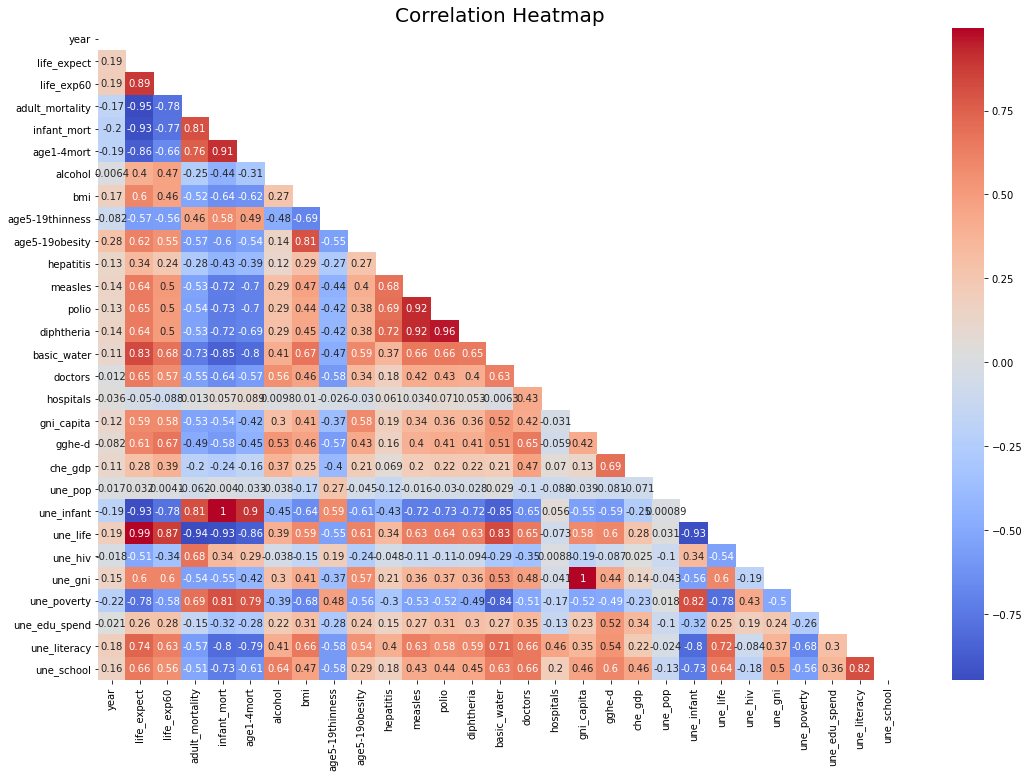

In [20]:
mask = np.triu(np.ones_like(data_df.corr()))
plt.subplots(figsize=(18,12))
dataplot = sns.heatmap(data_df.corr(), cmap="coolwarm", annot=True, mask=mask)
plt.title("Correlation Heatmap",size=20)
plt.show()

**Một số nhận xét về mối tương quan giữa các thuộc tính thông qua heatmap trên:**
- Có thể dễ dàng nhận thấy được các thuộc tính có tương quan đồng biến cao, liên hệ mật thiết với nhau như: Giữa une_life và life_expect, une_infant và infant_mort, une_gni vaf gni_capita, basic_water và life_expect, ...
- Các thuộc tính có tương quan nghịch biến cao, liên hệ mật thiết với nhau như: Giữa adult_mortality, infant mort với life_expect
- Có thể thấy tính tương quan của chỉ số life_expect với adult_mortality, infant mort, measles, polio, doctors là khá cao. Vì vậy, để tăng chỉ số tuổi thọ ta cần xem xét các thuộc tính này.
- Và giữa các thuộc tính có tính tương quan cao với chỉ số life_expect với adult_mortality, infant mort, measles, polio, doctor. Vì vậy có thể xem xét giảm đi các thuộc tính khác.
____________

# Đưa ra các câu hỏi cần trả lời - Câu hỏi 1
**Câu hỏi 1: Phân tích tuổi thọ của từng khu vực, từng quốc gia thay đổi như thế nào? Tại sao lại có sự không đồng đều giữa các khu vực như vậy?**
- Phân tích dựa trên tuổi thọ trung bình tất cả các năm của từng khu vực, từng quốc gia?
 + Các khu vực, quốc gia có tuổi thọ trung bình cao nhất, thấp nhất và sự phân bố các quốc gia đó theo châu lục.
- Tốc độ tăng trưởng của mỗi khu vực có sự biến động tăng, giảm ra sao?  
  + Khu vực có sự tốc độ tăng trưởng cao nhất, khu vực duy trì được sự ổn định.
- Tốc độ tăng  trưởng trong 3 năm gần đây nhất của từng khu vực và quốc gia?  Từ đó dự đoán tuổi thọ trong năm tiếp theo?
 + Việc phân tích trong khoảng thời gian mới nhất, để thấy rõ mức độ tăng trưởng tuổi thọ dương hay âm cụ thể và chính xác nhất.
 + Việc xem tốc độ tăng trưởng cụ thể để đưa ra dự báo cho các quốc gia trong năm tiếp theo.
 + Xem đất nước chúng ta "Việt nam" đang nằm ở đâu và mức độ tăng trưởng đang đi theo chiều hướng nào?

**Ý nghĩa khi đưa ra câu hỏi:** Trả lời được câu hỏi này sẽ giúp cho các quốc gia có cái nhìn tổng quát về tình hình tuổi thọ của đất nước mình, so với các quốc gia trong khu vực và trên thế giới đang đứng ở đâu. Từ đó chính phủ các nước đưa ra các giải pháp để duy trì và tăng tuổi thọ của đất nước trong năm tiếp theo.

## Sự phân bố tuổi thọ của các quốc gia trên toàn thế giới

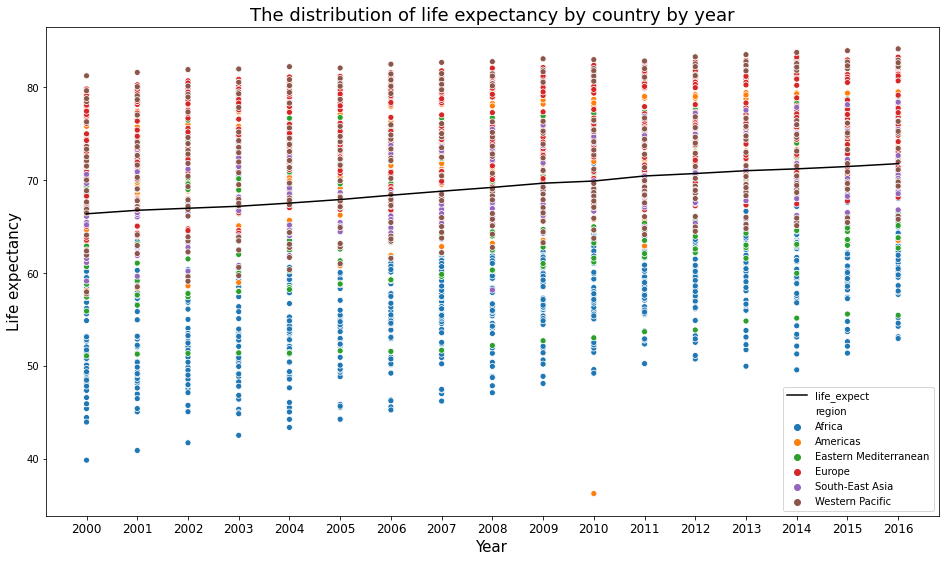

In [21]:
plt.figure(figsize=(16,9))
mean_life_expectancy_sr = data_df.groupby('year')['life_expect'].mean()
mean_life_expectancy_sr.plot.line(color='black')
sns.scatterplot(x=data_df['year'],y=data_df['life_expect'],hue=data_df['region'])
plt.xticks(range(data_df['year'].min(), data_df['year'].max()+1),size=12)
plt.xlabel('Year',size = 15)
plt.ylabel('Life expectancy',size = 15)
plt.title('The distribution of life expectancy by country by year',size=18)
plt.show()

**Nhận xét:** 
- Hầu hết các quốc gia ở Châu Âu, 1 số quốc gia ở phía Tây Thái Bình Dương và châu Mỹ có tuổi thọ trung bình cao hơn so với các khu vực còn lại trên thế giới.
- Khu vực châu Phi có tuổi thọ trung bình thấp nhất so với các châu lục khác và dưới mức trung bình tuổi thọ của thế giới.
- Nhận thấy có một quốc gia ở châu Mỹ có tuổi thọ rất thấp vào năm 2010 và ghi nghờ đây là 1 điểm outlier.

### Kiểm tra trường hợp nghi ngờ outlier ở khu vực châu mỹ vào năm 2010

In [22]:
america_2010_df = data_df[(data_df['region'] == 'Americas') & (data_df['year'] == 2010)]
index_min = america_2010_df['life_expect'].idxmin()
america_2010_df.loc[[index_min]]

,country,country_code,region,year,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,bmi,age5-19thinness,age5-19obesity,hepatitis,measles,polio,diphtheria,basic_water,doctors,hospitals,gni_capita,gghe-d,che_gdp,une_pop,une_infant,une_life,une_hiv,une_gni,une_poverty,une_edu_spend,une_literacy,une_school
1166,Haiti,HTI,Americas,2010,36.22736,10.728,682.5308,0.077865,0.0211,2.31526,24.6,4.1,7.5,NaN,64.0,66.0,67.0,62.20079,NaN,NaN,1490.0,1.45539,8.1456,9949.322,85.6,60.511,2.1,1480.0,NaN,NaN,NaN,NaN


In [23]:
haiti_df = data_df[data_df['country'] == 'Haiti'][['year','life_expect']]
haiti_df['life_expect'].describe()

count    17.000000
mean     59.955016
std       6.460289
min      36.227360
25%      58.615410
50%      62.605930
75%      63.077250
max      63.526110
Name: life_expect, dtype: float64

**Nhận xét:** 
- Đất nước bị nghi ngờ outlier đó chính là haiti. Bởi vì, vào năm 2010, đất nước Haiti xảy ra động đất sóng thần cướp đi sinh mạng của hàng ngàn người. Chính vì thế, tuổi thọ trung bình giảm trong năm đó là hoàn toàn chính xác. 
- Để tránh việc phân tích dữ liệu được chính xác, ta sẽ loại bỏ dữ liệu năm 2010 ở Haiti.

In [24]:
data_df = data_df[~((data_df['country'] == 'Haiti') & (data_df['year'] == 2010))].reset_index(drop=True)

## Tuổi thọ trung bình ở các châu lục qua các năm thay đổi như thế nào?

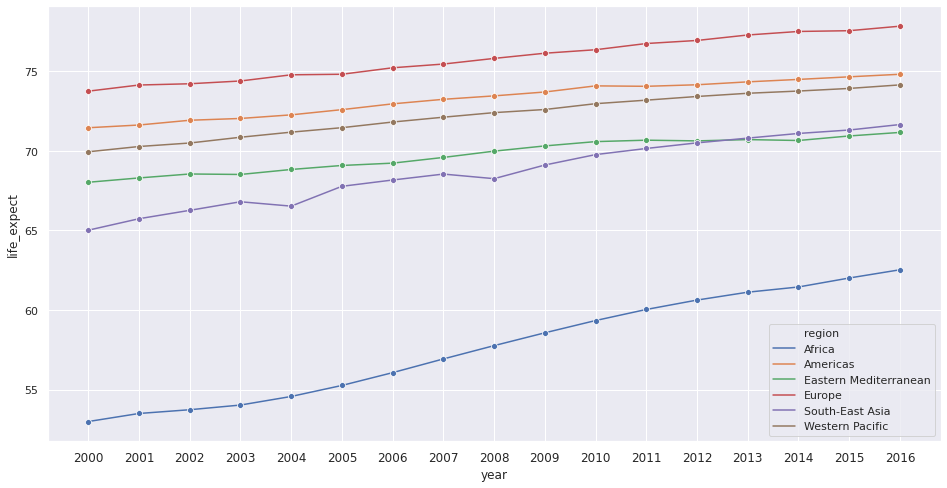

In [104]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.lineplot(x=data_df.year, y=data_df.life_expect, hue=data_df.region, ax=ax,ci=None,marker='o')
plt.xticks(range(data_df.year.min(),data_df.year.max()+1),size=12)
fig.show()

**Nhận xét:**
- Tuổi thọ trung bình của các quốc gia ở châu lục khác nhau đều tăng dần qua các năm.
- Khu vực đông Địa Trung Hải có sự biến động khá lớn qua các năm. Nhiều năm giảm một cách đột ngột nhưng sau đó nhưng tăng một cách đột ngột.
- Khu vực Châu Á có tuổi thọ tăng nhẹ, đều qua các năm. Riêng khu vực châu Âu và Châu Mỹ có 1, 2 lần giảm giảm tuổi thọ qua các năm.
- Khu vực Châu Phi có mức tăng tuổi thọ qua các năm lớn nhất nhưng vẫn còn thấp hơn khá nhiều so với các khu vực khác trên thế giới.

## Mức độ biến động tuổi thọ trung bình của toàn thế giới là như thế nào?

In [26]:
mean_life_expectancy_sr = data_df.groupby('year')['life_expect'].mean()
mean_life_expectancy_sr

year
2000    66.381261
2001    66.759911
2002    66.981275
2003    67.194990
2004    67.536497
2005    67.918202
2006    68.382742
2007    68.817387
2008    69.228267
2009    69.679568
2010    70.097304
2011    70.457992
2012    70.722041
2013    71.026033
2014    71.225480
2015    71.476842
2016    71.787813
Name: life_expect, dtype: float64

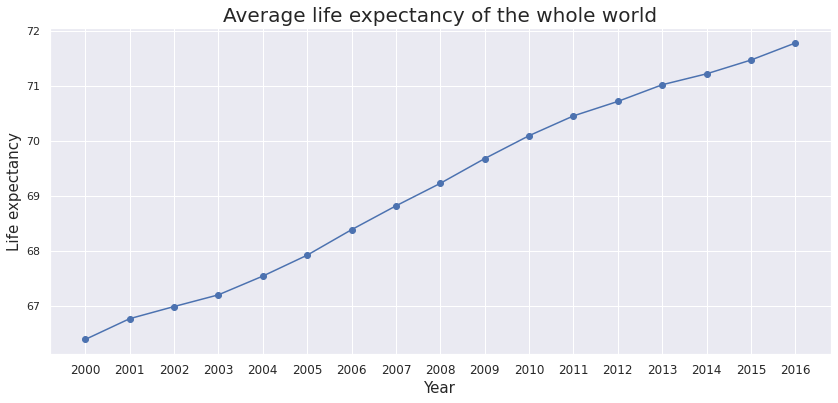

In [105]:
mean_life_expectancy_sr.plot.line(marker='o',figsize=(14,6))
plt.xticks(range(mean_life_expectancy_sr.index.min(),mean_life_expectancy_sr.index.max()+1),size=12)
plt.xlabel('Year',size=15)
plt.ylabel('Life expectancy',size=15)
plt.title('Average life expectancy of the whole world',size=20)
plt.show()

**Nhận xét:** 
- Tuổi thọ trung bình của toàn thế giới tăng qua từng năm đều có sự gia tăng.
- Từ mức tuổi thọ khá thấp 66.3 vào năm 2000. Đã tăng khoảng 5 tuổi và 
đạt giá trị cao nhất vào năm 2016 với tuổi thọ trung bình là 71.8 tuổi. Điều đó cho thấy các quốc gia đã chú trọng đến chăm sóc sức khỏe và đặc biệt có nhiều công nghệ hiện đại hỗ trợ việc gia tăng đó.

## Với mỗi châu lục, Tuổi thọ trung bình là như thế nào?

In [28]:
life_expect_region_df = data_df.groupby('region').agg({'life_expect':'mean'}).rename(columns={'life_expect':'mean_life_expect'})
life_expect_region_df = life_expect_region_df.sort_values(by='mean_life_expect',ascending=True)
life_expect_region_df

,mean_life_expect
region,
Africa,57.679362
South-East Asia,68.667484
Eastern Mediterranean,69.741827
Western Pacific,72.233377
Americas,73.271295
Europe,75.805259


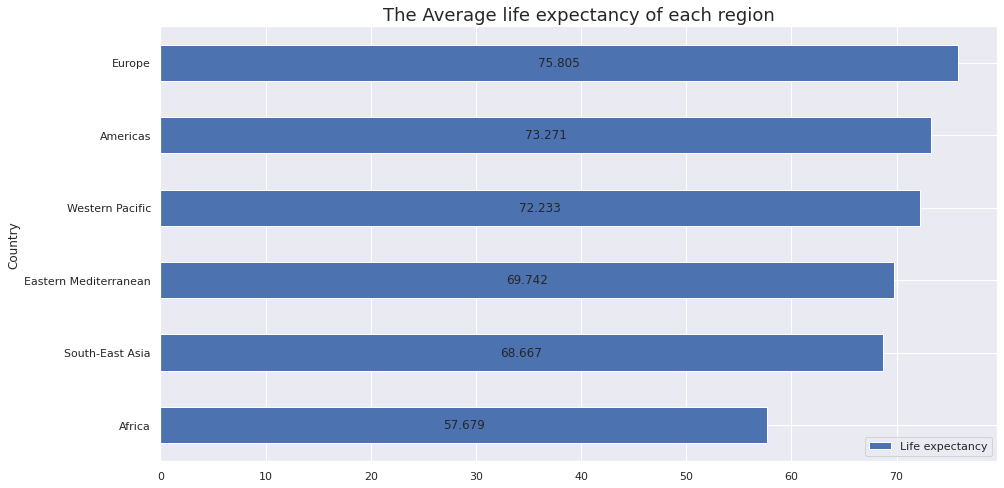

In [106]:
ax = life_expect_region_df.reset_index().plot(kind='barh',x='region',y='mean_life_expect',figsize=(15,8),label='Life expectancy')
plt.ylabel('Country',size=12)
plt.title('The Average life expectancy of each region',size=18)
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds  
    ax.annotate(format(round(float(width),3), ','), xy=(left+width/2, bottom+height/2), 
                ha='center', va='center')
plt.show()

**Nhận xét:**
- Tuổi thọ trung bình ở khu vực Châu Âu lớn nhất. Tiếp theo, đến khu vực châu Mỹ và châu Á.
- Tuổi thọ trung bình ở khu vực châu Phi có sự chênh lệch lớn so với các châu lục khác trên thế giới.


## Với mỗi quốc gia, tuổi thọ trung bình là như thế nào?

In [30]:
life_expectancy_country = data_df.groupby('country').agg({'life_expect':'mean'})
mean_expectancy_df = life_expectancy_country.rename(columns={'life_expect':'Mean life_expect'})
mean_expectancy_df.sort_values(by=['Mean life_expect'], ascending=False, inplace = True)

In [31]:
country_status = data_df[['country','region']]
country_status = country_status[~country_status.duplicated()]
country_expectancy_df = mean_expectancy_df.merge(country_status, left_on='country', right_on='country')
country_expectancy_df

,country,Mean life_expect,region
0,Japan,82.753574,Western Pacific
1,Switzerland,81.848187,Europe
2,Australia,81.543989,Western Pacific
3,Iceland,81.507846,Europe
4,Italy,81.490516,Europe
...,...,...,...
178,Chad,50.831692,Africa
179,Eswatini,50.260278,Africa
180,Lesotho,49.927415,Africa
181,Central African Republic,48.215201,Africa


### Top 10 quốc gia có tuổi thọ trung bình cao nhất thế giới

In [32]:
top_10_expectancy = country_expectancy_df[:10]
top_10_expectancy

,country,Mean life_expect,region
0,Japan,82.753574,Western Pacific
1,Switzerland,81.848187,Europe
2,Australia,81.543989,Western Pacific
3,Iceland,81.507846,Europe
4,Italy,81.490516,Europe
5,Spain,81.391195,Europe
6,Sweden,81.161942,Europe
7,Singapore,81.070605,Western Pacific
8,Canada,81.067231,Americas
9,France,81.029753,Europe


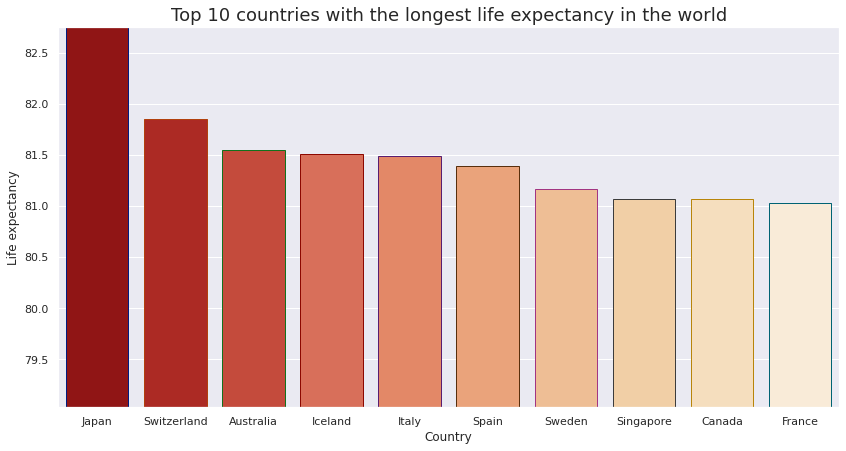

In [107]:
plt.subplots(figsize=(14,7))
sns.barplot(x=top_10_expectancy['country'], y=top_10_expectancy['Mean life_expect'], palette= 'OrRd_r',edgecolor=sns.color_palette('dark',25))
plt.ylabel('Life expectancy',size=12)
plt.xlabel('Country',size=12)
plt.title('Top 10 countries with the longest life expectancy in the world', size=18)
plt.ylim(min(top_10_expectancy['Mean life_expect'])-2, max(top_10_expectancy['Mean life_expect']))
plt.show()

#### 10 quốc gia có tuổi thọ lớn nhất thế giới thì tập trung ở khu vực nào?

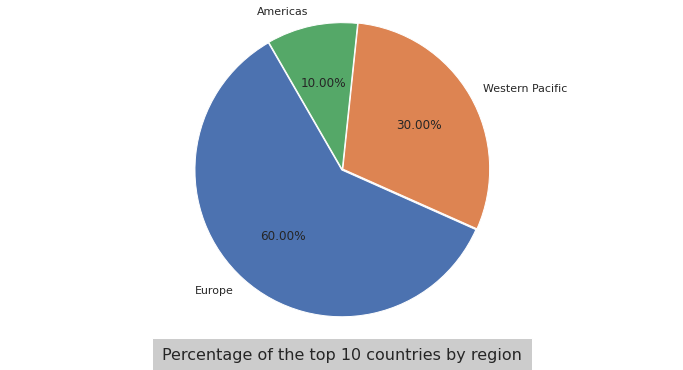

In [108]:
region_df = top_10_expectancy['region'].value_counts(normalize = True) *100
fig, ax = plt.subplots()
fig.set_size_inches(12,6)
ax.pie(region_df.values, labels = region_df.index,autopct='%1.2f%%',explode = (0.005,0.005,0), startangle = 120)
ax.axis('equal')
ax.set_title('Percentage of the top 10 countries by region', bbox={'facecolor':'0.8', 'pad':10},y=-0.1,size=16)
plt.show()

**Nhận xét:**
- Nhật Bản là quốc gia có tuổi thọ trung bình lớn nhất thế giới với độ tuổi trung bình 82.75. Đứng sau Nhật bản bao gồm Thụy Sĩ, Áo, Iceland, Ý, Tây Ban Nha, Thụy Điển, Sigapore, Canada và xếp cuối trong top 10 quốc gia là Pháp. 
- Nhận thấy trong top 10 các quốc gia tuổi thọ trung bình cao nhất thế giới thì hầu hết tập trung ở các nước Châu Âu và 1 số nước ở Châu Á.
- Tuy nhiên, số liệu ở đây là tính trong khoảng thời gian từ năm 2000->2016 nên sự so sánh ở đây còn khá khập khiễng, chưa phản ánh đúng sự chú ý đến tuổi thọ của chính phủ các quốc gia trong những năm gần đây.

### Top 10 quốc gia có tuổi thọ trung bình thấp nhất thế giới

In [35]:
tail_10_expectancy = country_expectancy_df[-10:]
tail_10_expectancy

,country,Mean life_expect,region
173,Mozambique,53.536801,Africa
174,Somalia,52.803960,Eastern Mediterranean
175,Côte d'Ivoire,51.484058,Africa
176,Zimbabwe,51.274442,Africa
177,Nigeria,51.192344,Africa
178,Chad,50.831692,Africa
179,Eswatini,50.260278,Africa
180,Lesotho,49.927415,Africa
181,Central African Republic,48.215201,Africa
182,Sierra Leone,46.791260,Africa


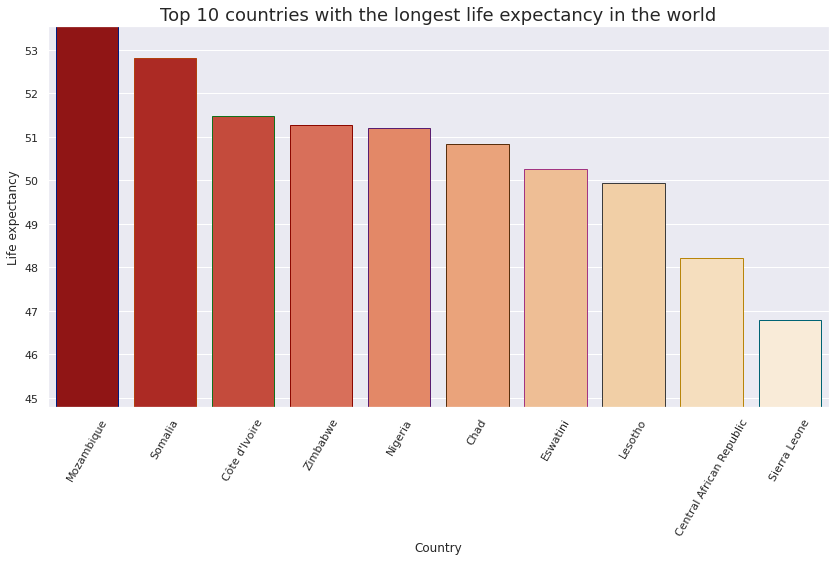

In [109]:
plt.subplots(figsize=(14,7))
sns.barplot(x=tail_10_expectancy['country'], y=tail_10_expectancy['Mean life_expect'], palette= 'OrRd_r',edgecolor=sns.color_palette('dark',25))
plt.xticks(rotation=60)
plt.ylabel('Life expectancy',size=12)
plt.xlabel('Country',size=12)
plt.title('Top 10 countries with the longest life expectancy in the world', size=18)
plt.ylim(min(tail_10_expectancy['Mean life_expect'])-2, max(tail_10_expectancy['Mean life_expect']))
plt.show()

#### 10 quốc gia có tuổi thọ thấp nhất thế giới thì tập trung ở khu vực nào?

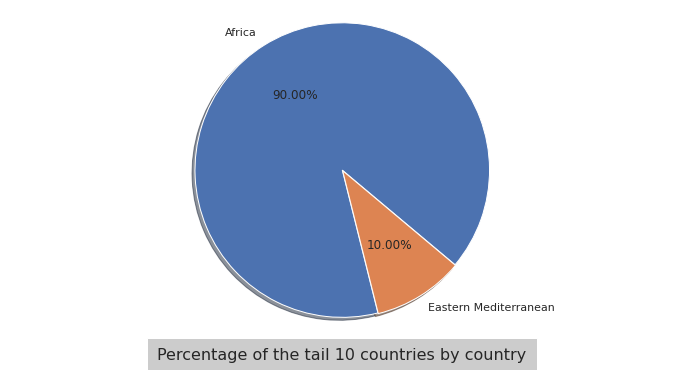

In [110]:
region_df = tail_10_expectancy['region'].value_counts(normalize = True) *100
fig, ax = plt.subplots()
fig.set_size_inches(12,6)
ax.pie(region_df.values, labels = region_df.index,autopct='%1.2f%%',explode = (0.005,0.),shadow=True, startangle = 320)
ax.axis('equal')
ax.set_title('Percentage of the tail 10 countries by country', bbox={'facecolor':'0.8', 'pad':10},y=-0.1,size=16)
plt.show()

**Nhận xét:**
- Sierra Leone là quốc gia có tuổi thọ trung bình thấp nhất thế giới với độ tuổi trung bình 46.8. Đứng trên Sierra leone bao gồm cộng hòa Trung Phi, Lesotho, Nigeria, ... và xếp đầu trong top 10 quốc gia thấp nhất là Mozambique. 
- Nhận thấy trong top 10 các quốc gia tuổi thọ trung bình thấp nhất thế giới thì hầu hết tập trung ở các quốc gia Châu Phi. 
- Một trong những vấn đề sức khỏe lớn nhất mà châu Phi phải đối mặt là đại dịch HIV / AIDS. HIV / AIDS đã cướp đi sinh mạng của nhiều người ở châu Phi, đó là lý do chính khiến tuổi thọ trung bình thấp đến vậy. Việc chữa trị những căn bệnh này rất khó khăn vào thời kỳ cao điểm của dịch bệnh, rất nhiều người châu Phi đã không may qua đời.

Nguồn: https://borgenproject.org/life-expectancy-in-africa-improves/

## Tốc độ tăng trưởng của mỗi khu vực là như thế nào?

In [114]:
min_year = data_df['year'].min()
max_year = data_df['year'].max()

In [115]:
df1 = data_df[data_df['year'].isin([min_year,max_year])]
df1.head()

,country,country_code,region,year,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,bmi,age5-19thinness,age5-19obesity,hepatitis,measles,polio,diphtheria,basic_water,doctors,hospitals,gni_capita,gghe-d,che_gdp,une_pop,une_infant,une_life,une_hiv,une_gni,une_poverty,une_edu_spend,une_literacy,une_school
0,Angola,AGO,Africa,2000,47.33730,14.73400,383.5583,0.137985,0.025695,1.47439,21.7,11.0,0.5,NaN,32.0,21.0,31.0,41.14431,NaN,NaN,2190.0,1.11099,1.90860,16395.473,122.2,46.522,1.0,2530.0,32.3,2.60753,NaN,NaN
16,Angola,AGO,Africa,2016,62.63262,17.34829,237.9694,0.057900,0.007520,5.38006,23.3,8.3,2.4,55.0,45.0,53.0,59.0,55.08428,NaN,NaN,NaN,1.19754,2.71315,28842.489,55.5,59.925,1.9,6410.0,NaN,NaN,NaN,NaN
17,Burundi,BDI,Africa,2000,51.43743,15.71862,369.9736,0.103510,0.017145,7.17131,20.6,9.1,0.3,NaN,72.0,71.0,80.0,50.66312,NaN,NaN,580.0,1.46507,6.17697,6378.871,95.7,49.091,3.3,580.0,NaN,2.64548,59.30362,NaN
33,Burundi,BDI,Africa,2016,60.09811,16.59126,290.1858,0.052420,0.006450,3.88586,21.7,7.3,1.9,94.0,93.0,94.0,94.0,60.20415,NaN,NaN,NaN,1.80345,7.49216,10487.995,44.0,60.528,1.2,740.0,NaN,4.69272,NaN,NaN
34,Benin,BEN,Africa,2000,55.60088,16.44590,281.8114,0.096595,0.015685,1.43565,22.1,9.9,0.8,NaN,70.0,78.0,78.0,61.45970,NaN,NaN,1200.0,1.10300,4.23001,6865.951,86.4,55.391,1.3,1320.0,NaN,2.88869,NaN,NaN


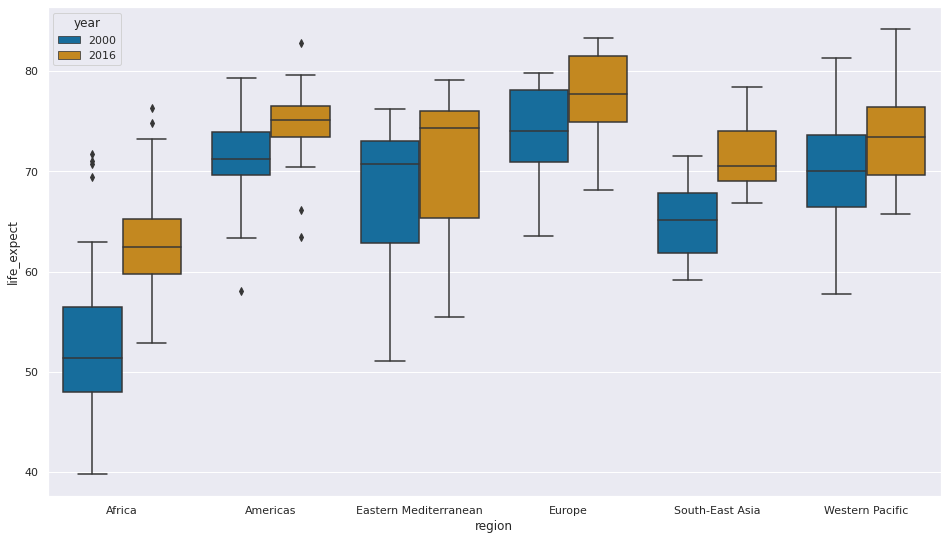

In [116]:
plt.subplots(figsize=(16,9))
sns.boxplot(y='life_expect', x='region', 
                 data=df1, 
                 palette="colorblind",
                 hue='year')
plt.show()

**Nhận xét:**
- Tăng trưởng tuổi thọ đồng đều nhất trong 15 năm được quan sát được quan sát thấy ở Khu vực Đông Nam Á.
- Châu Phi là khu vực có tốc độ tăng trưởng nhanh nhất nhưng vẫn còn có sự chênh lệch tuổi thọ lớn giữa các quốc gia trong khu vực và tuổi thọ còn thấp so với các khu vực còn lại. Trong khi Cape Verde là ngoại lệ với tuổi thọ cao.
- Các quốc gia trong Khu vực châu Mỹ là đồng nhất về tuổi thọ, mặc dù Bolivia và Haiti có giá trị thấp hơn so với các quốc gia khác trong khu vực.

## Tốc độ tăng trưởng tuổi thọ của các quốc gia trên thế giới trong 3 gần đây nhất

- Để có cái nhìn chính xác hơn, ta chỉ lấy số liệu trong 3 năm gần đây nhất. Phần này, nhóm sẽ có cái nhìn tổng quát hơn về số liệu như đưa ra tốc độ tăng trưởng trung bình trong 3 năm và từ đó có thể dự đoán tuổi thọ trung bình các quốc gia đó trong các năm tiếp theo.

In [41]:
def growth_rate_by_country(country, expectancy_df, name_attr, number_year):
    sort_year_expectancy_df = expectancy_df[expectancy_df['country'] == country].sort_values(by = 'year')[-number_year:]
    expectancy_values = sort_year_expectancy_df[name_attr].values
    mean_growth_rate_year = (np.diff(expectancy_values) / expectancy_values[:-1])*100
    return country, mean_growth_rate_year.mean()

In [42]:
#country_rate_growth_df là 1 dataframe chứa 2 cột country và Rate growth life expectancy (tốc độ tăng trưởng tuổi thọ) 
number_year = 3
country_rate_growth = [growth_rate_by_country(country, data_df, 'life_expect', number_year) for country in data_df['country'].unique()]
country_rate_growth = dict(country_rate_growth)
country_rate_growth_df = pd.Series(country_rate_growth).to_frame().reset_index()
country_rate_growth_df.columns=['country','Rate growth life expectancy']

In [43]:
# Kết hợp với dữ liệu của năm 2016 để thấy được rõ hơn tuổi thọ hiện tại. 
max_year = data_df[data_df['year'] == data_df['year'].max()]
country_rate_growth_df = country_rate_growth_df.merge(max_year[['country','year','life_expect','region']],left_on='country',right_on='country')
country_rate_growth_df = country_rate_growth_df.sort_values(by='life_expect',ascending=False).set_index('country')
country_rate_growth_df.head()

,Rate growth life expectancy,year,life_expect,region
country,,,,
Japan,0.232679,2016,84.16616,Western Pacific
Switzerland,-0.008585,2016,83.26371,Europe
Spain,0.040871,2016,83.07912,Europe
Singapore,0.226378,2016,82.94685,Western Pacific
France,0.228772,2016,82.94602,Europe


### Top 10 quốc gia có tuổi thọ lớn nhất thế giới, tốc độ tăng trưởng như thế nào?

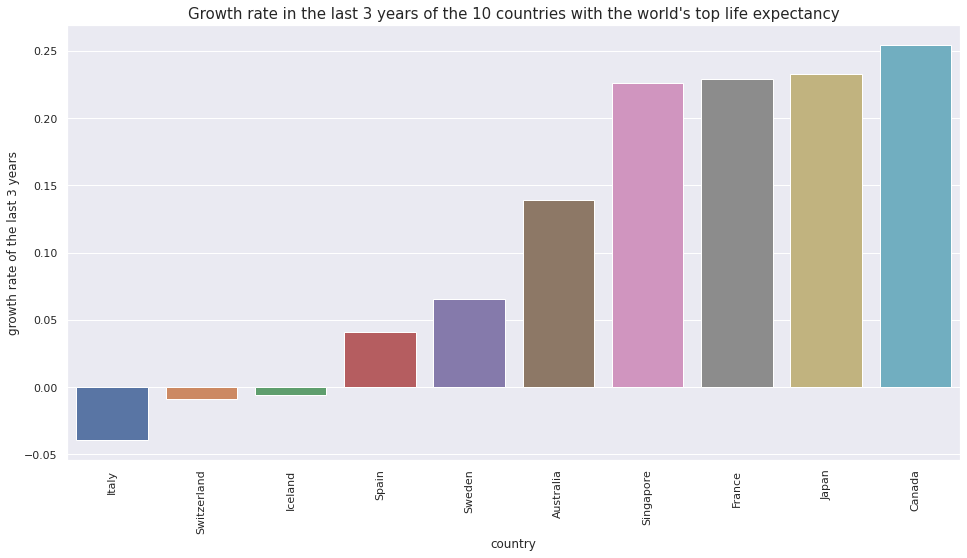

In [117]:
name_country = top_10_expectancy['country'].tolist()
top_10_life_expect_rate = country_rate_growth_df.loc[name_country]['Rate growth life expectancy'].sort_values(ascending = True)
plt.figure(figsize=(16,8))
sns.barplot(x=top_10_life_expect_rate.index, y=top_10_life_expect_rate.values)
plt.xticks(rotation=90)
plt.ylabel('growth rate of the last 3 years',size=12)
plt.title("Growth rate in the last 3 years of the 10 countries with the world's top life expectancy",size=15)
plt.show()

**Nhận xét:** Trong 10 quốc gia có tuổi thọ trung bình lớn nhất thế giới, 3 quốc gia có tốc độ trung bình đang có xu hướng giảm đó là Italy, Thụy Sĩ và Iceland. Còn lại các quốc gia khác đang có xu hướng tăng, trung bình khoảng 0.2% mỗi năm.

### Top 10 quốc gia có tuổi thọ thấp nhất thế giới, tốc độ tăng trưởng như thế nào?

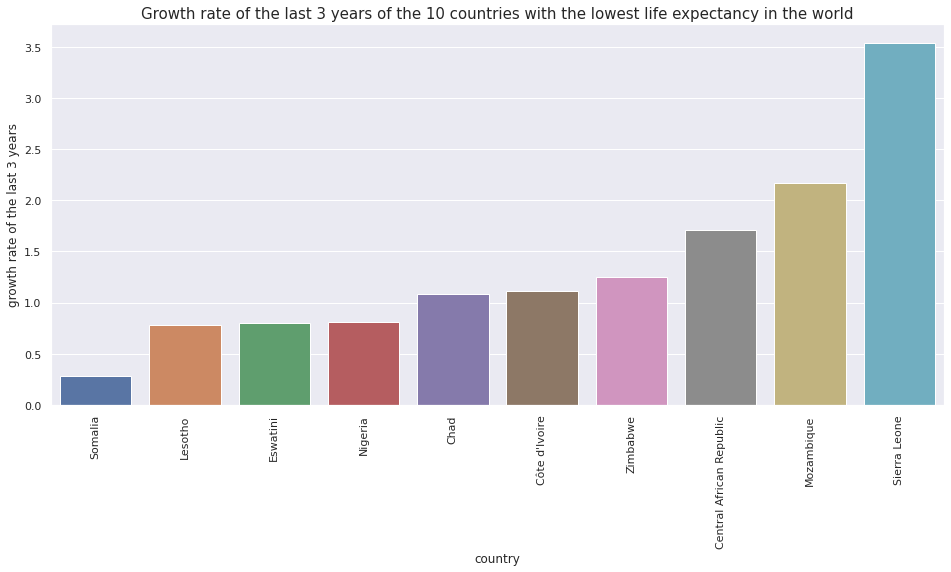

In [118]:
name_country = tail_10_expectancy['country'].tolist()
top_10_life_expect_rate = country_rate_growth_df.loc[name_country]['Rate growth life expectancy'].sort_values(ascending = True)
plt.figure(figsize=(16,7))
sns.barplot(x=top_10_life_expect_rate.index, y=top_10_life_expect_rate.values)
plt.xticks(rotation=90)
plt.ylabel('growth rate of the last 3 years',size=12)
plt.title("Growth rate of the last 3 years of the 10 countries with the lowest life expectancy in the world",size=15)
plt.show()

**Nhận xét:** Trong 10 quốc gia có tuổi thọ trung bình thấp nhất thế giới, tất cả các quốc gia khác đang có xu hướng tăng, trung bình khoảng 1.2% mỗi năm. Ngoài ra, có 1 số quốc gia có xu hướng tăng rất nhanh như Mozambique, Siera Leone với tốc độ hơn 2% mỗi năm.

### Top 10 quốc gia có tuổi thọ trung bình lớn nhất thế giới năm 2016

In [46]:
top_10_country_year_2016 = set(country_rate_growth_df.iloc[:10].index)
new_country = top_10_country_year_2016 - set(top_10_expectancy['country'])
new_country

{'Norway', 'Republic of Korea'}

In [47]:
country_rate_growth_df.loc[new_country]

,Rate growth life expectancy,year,life_expect,region
country,,,,
Republic of Korea,0.28926,2016,82.66409,Western Pacific
Norway,0.15189,2016,82.47630,Europe


**Nhận xét:**
- Trong 10 quốc gia có tuổi thọ trung bình lớn nhất thế giới năm 2016 so với 10 quốc gia  tuổi thọ trung bình lớn nhất thế giới giai đoạn 2000 - 2016 thì có 2 quốc gia mới là norway và hàn quốc.

### Với các quốc gia ở Châu Âu, tốc độ tăng trưởng như thế nào?

In [48]:
europe_country = country_rate_growth_df[country_rate_growth_df['region'] == 'Europe']
europe_country[['life_expect','Rate growth life expectancy']].describe()

,life_expect,Rate growth life expectancy
count,50.000000,50.000000
mean,77.819102,0.223157
std,4.179629,0.238465
min,68.164240,-0.144451
25%,74.879868,0.035326
50%,77.757440,0.202619
75%,81.518637,0.315055
max,83.263710,1.218504


**Nhận xét:** 
- Hầu hết các các quốc gia ở Châu Âu có tuổi thọ trung bình tương đối cao (khoảng 78 tuổi) và tốc độ tăng tuổi thọ mỗi năm ở mức độ vừa phải (khoảng 0.2%). 
- Bởi vì tuổi thọ con người có mức hạn nhất định, nên khi đến độ tuổi trên 80, hiện tượng lão hóa ở người lớn bắt đầu có dấu hiệu thì tốc độ tăng tuổi thọ sẽ không còn được cao so với các độ tuổi thấp hơn.

In [49]:
europe_country[europe_country['Rate growth life expectancy'] > 0.5]

,Rate growth life expectancy,year,life_expect,region
country,,,,
Belarus,0.606144,2016,74.15955,Europe
Ukraine,1.218504,2016,72.49735,Europe
Russian Federation,0.514653,2016,71.86533,Europe
Kyrgyzstan,0.626104,2016,71.40205,Europe
Kazakhstan,0.667497,2016,71.14480,Europe
Turkmenistan,0.529173,2016,68.16424,Europe


**Nhận xét:** 
- Nhận thấy hầu hết các quốc gia có tốc độ tăng tuổi thọ khá cao điển hình như Belarus, Ukraine, Nga, ..(từ liên xô, nam tư chia ra).
- Dù có tốc độ tăng trưởng khá cao nhưng tuổi thọ trung bình vẫn thấp hơn khá nhiều so với tuổi thọ trung bình của khu vực. Nguyên nhân ...

In [50]:
europe_country[europe_country['Rate growth life expectancy'] < 0]

,Rate growth life expectancy,year,life_expect,region
country,,,,
Switzerland,-0.008585,2016,83.26371,Europe
Italy,-0.039163,2016,82.77284,Europe
Iceland,-0.005977,2016,82.39584,Europe
Netherlands,-0.048216,2016,81.63280,Europe
Malta,-0.029308,2016,81.49574,Europe
Belgium,-0.022273,2016,81.16279,Europe
Greece,-0.054121,2016,81.16033,Europe
Germany,-0.003444,2016,81.00278,Europe
Slovenia,-0.010794,2016,80.91451,Europe


**Nhận xét:** Có 1 số nước bị giảm tuổi thọ tương đối lớn như Thụy Si, Bỉ, Đức, Ý (tập trung ở Đông Âu) nhưng đa phần các quốc gia vẫn có tuổi thọ trung bình cao hơn mức trung bình của khu vực. Nguyên nhân trong khoảng thời gian 2013-2016, các nước này bị một số nguồn lây nhiễm Non-Communicable Diseases, nên tỉ lệ tử vong ngày càng nhiều và dẫn đến tuổi thọ trung bình bị giảm xuống nhưng tỉ lệ giảm xuống không đáng kể.

### Với các quốc gia ở Châu Phi,  tốc độ tăng trưởng như thế nào?

In [51]:
Africa_country = country_rate_growth_df[country_rate_growth_df['region'] == 'Africa']
Africa_country[['life_expect','Rate growth life expectancy']].describe()

,life_expect,Rate growth life expectancy
count,47.000000,47.000000
mean,62.526440,0.908341
std,5.396261,0.680389
min,52.938010,0.091400
25%,59.813050,0.561000
50%,62.495410,0.777371
75%,65.238830,1.036720
max,76.363650,3.542276


**Nhận xét:** Hầu hết các các quốc gia ở Châu  Phi có tuổi thọ trung bình tương đối thấp (khoảng 65 tuổi) và tốc độ tăng tuổi thọ mỗi năm ở mức độ vừa phải (khoảng 0.8%). 

In [52]:
Africa_country[Africa_country['Rate growth life expectancy'] > 2]

,Rate growth life expectancy,year,life_expect,region
country,,,,
Liberia,3.425052,2016,62.94294,Africa
Mozambique,2.170155,2016,60.09870,Africa
Sierra Leone,3.542276,2016,53.13050,Africa


**Nhận xét:**
- 1 số quốc gia như Liberia, Mozambique, Siera Leone có tốc độ tăng tuổi thọ cao. Tuy vẫn còn thấp so với tuổi thọ trung bình trong khu vực nhưng với tốc độ tăng trưởng này thì 1 vài năm sau có thể bắt kịp tuổi thọ trung bình trong khu vực và xa hơn là ngang bằng với tuổi thọ trung bình trên toàn thế giới.

### Với các quốc gia ở châu Á, tốc độ tăng trưởng như thế nào?

In [53]:
western_pacific_country = country_rate_growth_df[country_rate_growth_df['region'] == 'Western Pacific']
western_pacific_country[['life_expect','Rate growth life expectancy']].describe()

,life_expect,Rate growth life expectancy
count,21.000000,21.000000
mean,74.134015,0.265643
std,6.039573,0.118364
min,65.790890,0.010789
25%,69.595250,0.224204
50%,73.429950,0.238610
75%,76.427420,0.296795
max,84.166160,0.523393


**Nhận xét:** 
- Các các quốc gia ở Châu Á có tuổi thọ trung bình khoảng 73.5 tuổi.
- Hầu hết các nước ở châu Á đều có tốc độ tăng tuổi thọ mỗi năm đều tăng và mức độ tăng ở mức độ vừa phải (khoảng 0.25%).
- 1 số quốc gia châu á ngoại lệ như Nhật Bản, Hàn Quốc đã lọt vào top các quốc gia có tuổi thọ trung bình đứng đầu thế giới.

#### Tìm hiểu đất nước thân yêu của chúng ta "Việt Nam"

In [54]:
western_pacific_country.loc[['Viet Nam'],:]

,Rate growth life expectancy,year,life_expect,region
country,,,,
Viet Nam,0.233217,2016,76.33917,Western Pacific


**Nhận xét:** Đất nước chúng ta có tuổi thọ trung bình cao trong các đất nước ở Châu Á và cao hơn so với tuổi thọ trung bình của toàn thế giới. Ngoài ra, tốc độ tăng trưởng mỗi năm khá tương đồng so với các quốc gia ở Châu Á khác. Điều đó cho thấy chính phủ đã có những chính sách, giải pháp quan tâm đến sức khỏe của người dân.

`Thật tuyệt vời :)`

### Dự báo tuổi thọ trung bình của các nước trong năm tiếp theo

In [55]:
forecast_life_expectancy = country_rate_growth_df.copy()
a = forecast_life_expectancy['Rate growth life expectancy'] * forecast_life_expectancy['life_expect'] / 100
forecast_life_expectancy['life_expect'] = a + forecast_life_expectancy['life_expect']
forecast_life_expectancy['year'] = forecast_life_expectancy['year'].replace(2016,2017)

In [56]:
life_expect_2107_df = forecast_life_expectancy.reset_index()[['country','year','region','life_expect']]
life_expect_2107_df

,country,year,region,life_expect
0,Japan,2017,Western Pacific,84.361997
1,Switzerland,2017,Europe,83.256562
2,Spain,2017,Europe,83.113075
3,Singapore,2017,Western Pacific,83.134623
4,France,2017,Europe,83.135777
...,...,...,...,...
178,Côte d'Ivoire,2017,Africa,55.198209
179,Chad,2017,Africa,54.845710
180,Sierra Leone,2017,Africa,55.012529
181,Central African Republic,2017,Africa,53.951868


In [57]:
#merge dữ liệu của 3 năm (2014,2015,2016) với năm 2017
life_expect_three_year_df = data_df[data_df['year'].isin([2014,2015,2016])].loc[:,['country','year','region','life_expect']]
life_expect_for_year_df = pd.concat([life_expect_three_year_df,life_expect_2107_df],axis=0)

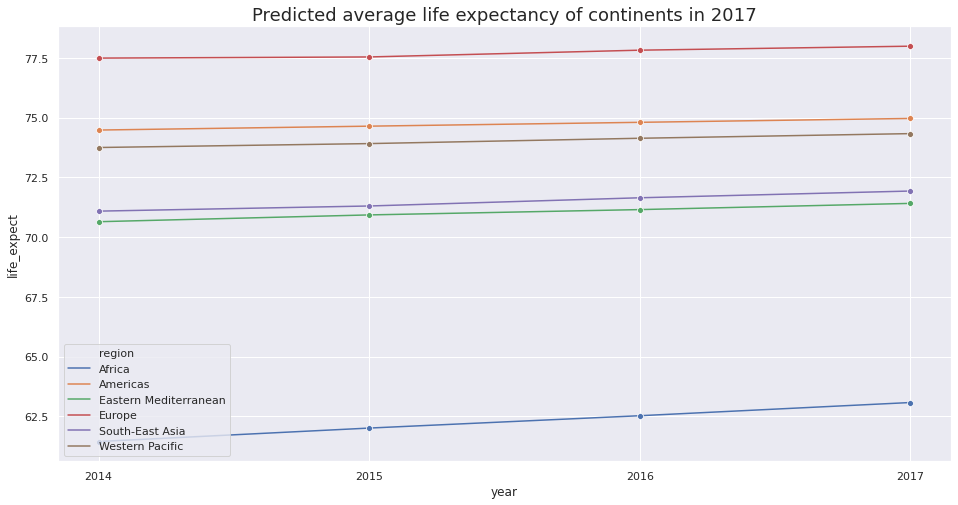

In [119]:
#trực quan hóa
fig, ax = plt.subplots(figsize=(16, 8))
sns.lineplot(x=life_expect_for_year_df.year, y=life_expect_for_year_df.life_expect, hue=life_expect_for_year_df.region, ax=ax,ci=None,marker='o')
plt.title('Predicted average life expectancy of continents in 2017',size=18)
plt.xticks(range(2014,2018))
plt.legend(loc='lower left')
fig.show()

# Đưa ra câu hỏi cần trả lời - Câu hỏi 2
**Câu hỏi 2: Xét thuộc tính GNI per capita và GGHE-D của các khu vực và quốc gia biến động như thế nào? Liệu có mối quan hệ gì đến tuổi thọ trung bình (life expectancy) hay không?**

**Đối với thuộc tính gni đầu người:**
- GNI đầu người toàn thế giới qua các năm biến động như thế nào?
  + Xem có điều gì biến động lạ qua các năm không? Nếu có, phân tích rõ hơn gni đầu người trong năm đó.
- GNI đầu người trong từng khu vực và mối quan hệ với life expectancy như thế nào?
- GNI đầu người của các nước như thế nào? 
  + Top 10 quốc gia có tuổi thọ đứng đầu thế giới thì gni đứng ở đâu và tốc độ gni đầu người hằng năm là bao nhiêu.
- Phân tích mối quan hệ tuyến giữa gni đầu người và tuổi thọ.

**Ý nghĩa khi đưa ra câu hỏi:** Xem GNI đầu người có ảnh hưởng và tác động như thế nào đến tuổi thọ. Từ đó, quốc gia muốn tăng tuổi thọ thì mức tăng gni đầu người hằng năm là bao nhiêu?

# Xét thuộc tính une-gni và xem có mối quan hệ gì đến life expectancy (tuổi thọ trung bình) hay không?

## GNI đầu người toàn thế giới qua các năm biến động như thế nào?

In [59]:
year_gni = data_df.groupby('year')['une_gni'].mean()
year_gni

year
2000    10817.572254
2001    11109.137931
2002    11414.943182
2003    11836.193182
2004    12615.738636
2005    13293.806818
2006    14444.545455
2007    15338.863636
2008    15818.806818
2009    15226.158192
2010    15821.704545
2011    16293.595506
2012    16973.389831
2013    17593.276836
2014    18072.768362
2015    18586.136364
2016    19047.045455
Name: une_gni, dtype: float64

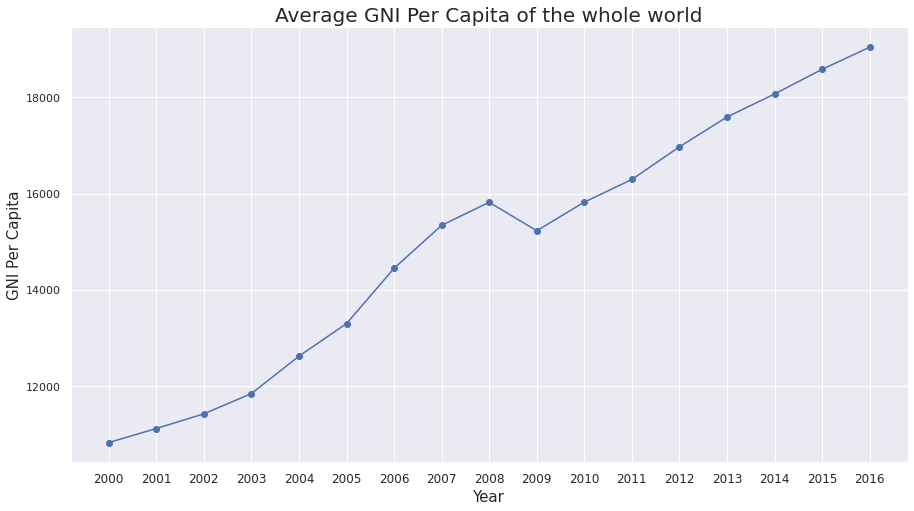

In [120]:
year_gni.plot.line(marker='o',figsize=(15,8))
plt.xticks(range(mean_life_expectancy_sr.index.min(),mean_life_expectancy_sr.index.max()+1),size=12)
plt.xlabel('Year',size=15)
plt.ylabel('GNI Per Capita',size=15)
plt.title('Average GNI Per Capita of the whole world',size=20)
plt.show()

**Nhận xét:** 
- Đa phần trung bình gni trên đầu người trên thế giới qua các năm đều có sự gia tăng qua từng năm. 
- Riêng khoảng từ năm 2008 đến 2009 có sự giảm tương đối lớn.

## Phân tích sự giảm gni đầu người trong giai đoạn 2008-2009 và xem tuổi thọ trong giai đoạn đó biến động như thế nào?

In [61]:
df1 = data_df[data_df['year'].isin([2008,2009])]
df1 = df1[~df1['une_gni'].isna()]
df1.head()

,country,country_code,region,year,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,bmi,age5-19thinness,age5-19obesity,hepatitis,measles,polio,diphtheria,basic_water,doctors,hospitals,gni_capita,gghe-d,che_gdp,une_pop,une_infant,une_life,une_hiv,une_gni,une_poverty,une_edu_spend,une_literacy,une_school
8,Angola,AGO,Africa,2008,56.12413,16.28414,292.1559,0.090765,0.014585,5.19452,22.6,9.6,1.2,45.0,48.0,36.0,49.0,48.77040,NaN,NaN,5720.0,2.13844,3.32290,21695.634,85.8,53.243,1.6,5260.0,30.1,NaN,NaN,NaN
9,Angola,AGO,Africa,2009,57.29004,16.48146,281.0492,0.084800,0.013310,6.11778,22.7,9.4,1.3,47.0,46.0,36.0,50.0,49.57516,1.313,NaN,6200.0,2.60046,3.84261,22514.281,80.7,54.311,1.7,5500.0,NaN,NaN,NaN,NaN
25,Burundi,BDI,Africa,2008,56.15262,16.15658,340.4030,0.070920,0.010495,4.79559,21.2,8.0,0.8,92.0,84.0,89.0,92.0,55.32520,NaN,NaN,690.0,1.55559,9.23542,8126.102,66.3,55.721,1.8,690.0,NaN,5.19290,48.08406,2.43024
26,Burundi,BDI,Africa,2009,56.94687,16.22978,330.1201,0.066960,0.009760,4.49375,21.3,7.9,0.9,94.0,91.0,96.0,94.0,55.92218,NaN,NaN,690.0,2.07939,10.35022,8397.668,62.7,56.488,1.7,690.0,NaN,6.17195,NaN,NaN
42,Benin,BEN,Africa,2008,58.18098,16.77504,276.0660,0.077865,0.011770,1.38337,22.9,8.3,1.5,75.0,66.0,77.0,75.0,64.09259,0.623,NaN,1580.0,0.76933,3.68345,8696.921,73.2,58.654,1.1,1770.0,NaN,3.79566,NaN,NaN


In [62]:
#gni_rate_growth tạo ra 1 dataframe chứa country và tốc độ tăng trưởng gni của năm 2019 so với năm 2018
number_year = 2
gni_rate_growth = [growth_rate_by_country(country,df1,'une_gni', number_year) for country in df1['country'].unique()]
gni_rate_growth = dict(gni_rate_growth)
gni_rate_growth = pd.Series(gni_rate_growth).to_frame().reset_index()
gni_rate_growth.columns=['country','Rate growth gni']

In [63]:
#life_expect_rate_growth tạo ra 1 dataframe chứa country và tốc độ tăng trưởng life_expect của năm 2019 so với năm 2018
life_expect_rate_growth = [growth_rate_by_country(country,df1,'life_expect', number_year) for country in df1['country'].unique()]
life_expect_rate_growth = dict(life_expect_rate_growth)
life_expect_rate_growth = pd.Series(life_expect_rate_growth).to_frame().reset_index()
life_expect_rate_growth.columns=['country','Rate growth life_expect']

In [64]:
#kết hợp 2 dataframe gni_rate_growth và life_expect_rate_growth
gni_life_expect_year = gni_rate_growth.merge(life_expect_rate_growth, on='country')
gni_life_expect_year

,country,Rate growth gni,Rate growth life_expect
0,Angola,4.562738,2.077377
1,Burundi,0.000000,1.414449
2,Benin,0.000000,1.288944
3,Burkina Faso,0.000000,1.406846
4,Botswana,-4.323002,3.205589
...,...,...,...
172,Japan,-4.760571,0.372920
173,Cambodia,-0.884956,1.041917
174,Kiribati,-5.859375,0.757281
175,Republic of Korea,-1.361257,0.480232


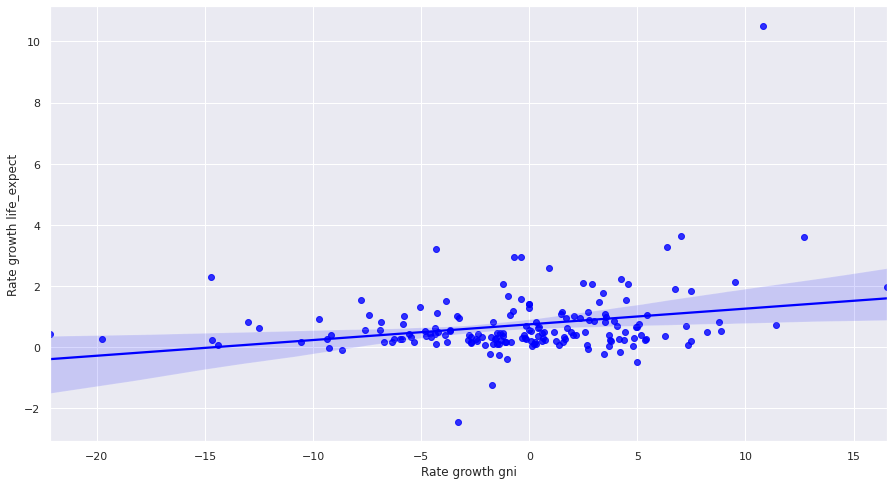

In [121]:
fig, ax = plt.subplots(figsize=(15,8))
sns.regplot(x=gni_life_expect_year['Rate growth gni'],y=gni_life_expect_year['Rate growth life_expect'], color = 'blue', ax = ax)
plt.show()

**Nhận xét:** 
- Có 1 số điểm tốc độ tăng trưởng âm lớn (<-10) nhưng tuổi thọ trung bình của năm đó vẫn tăng nhẹ điều đó cho thấy gdp chỉ là 1 tác động nhỏ vào life expectancy.

## Biểu diễn mối quan hệ gni đầu người theo khu vực

**Notes:** Bởi vì đang tìm mối quan hệ giữa gni với life expectancy nên những quốc gia không có số liệu về gni sẽ bị loại bỏ. Điều này không ảnh hưởng tới việc biểu diễn mối quan hệ giữa 2 thuộc tính này.

In [66]:
gni_life_expect_df = data_df[~data_df['une_gni'].isna()].reset_index(drop=True)
gni_life_expect_df.head()

,country,country_code,region,year,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,bmi,age5-19thinness,age5-19obesity,hepatitis,measles,polio,diphtheria,basic_water,doctors,hospitals,gni_capita,gghe-d,che_gdp,une_pop,une_infant,une_life,une_hiv,une_gni,une_poverty,une_edu_spend,une_literacy,une_school
0,Angola,AGO,Africa,2000,47.33730,14.73400,383.5583,0.137985,0.025695,1.47439,21.7,11.0,0.5,NaN,32.0,21.0,31.0,41.14431,NaN,NaN,2190.0,1.11099,1.90860,16395.473,122.2,46.522,1.0,2530.0,32.3,2.60753,NaN,NaN
1,Angola,AGO,Africa,2001,48.19789,14.95963,372.3876,0.133675,0.024500,1.94025,21.8,10.9,0.5,NaN,60.0,28.0,42.0,42.25467,NaN,NaN,2290.0,2.04631,4.48352,16945.753,118.9,47.059,1.1,2630.0,NaN,NaN,67.40542,NaN
2,Angola,AGO,Africa,2002,49.42569,15.20010,354.5147,0.128320,0.023260,2.07512,21.9,10.7,0.6,NaN,59.0,22.0,47.0,43.37680,NaN,NaN,2690.0,1.30863,3.32946,17519.417,115.1,47.702,1.2,3180.0,NaN,NaN,NaN,NaN
3,Angola,AGO,Africa,2003,50.50266,15.39144,343.2169,0.122040,0.021925,2.20275,22.0,10.5,0.7,NaN,44.0,21.0,46.0,44.36387,NaN,NaN,2820.0,1.46560,3.54797,18121.479,110.8,48.440,1.3,3260.0,NaN,NaN,NaN,NaN
4,Angola,AGO,Africa,2004,51.52863,15.56860,333.8711,0.115700,0.020545,2.41274,22.2,10.3,0.8,NaN,43.0,18.0,47.0,45.35134,0.621,NaN,3080.0,1.68663,3.96720,18758.145,106.2,49.263,1.3,3560.0,NaN,NaN,NaN,NaN


In [67]:
gni_life_expect_df.shape

(2993, 32)

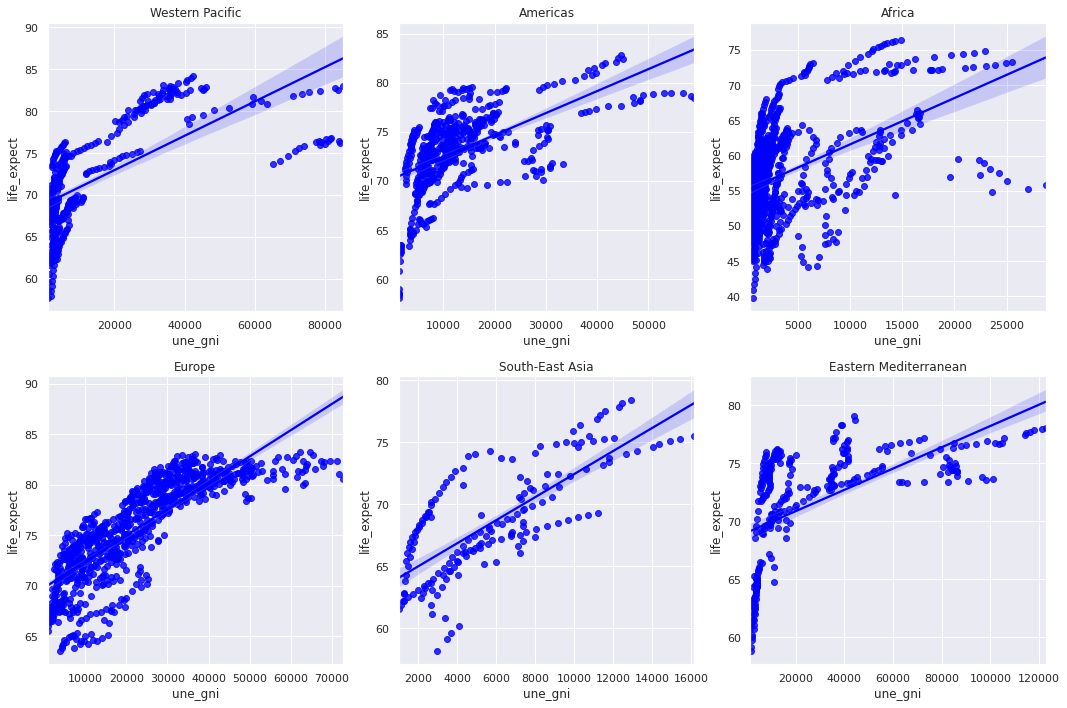

In [122]:
fig, axs = plt.subplots(2,3, figsize=(15, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.5)

for conts, ax in zip(set(gni_life_expect_df["region"]), axs.flat):
    Conts = gni_life_expect_df[gni_life_expect_df['region'] == conts]
    sns.regplot(x = Conts['une_gni'],y = Conts["life_expect"], color = 'blue', ax = ax).set_title(conts)

plt.tight_layout()  
sns.set(color_codes=True)
plt.show()

**Nhận xét:** 
- Tất cả các khu vực đều cho thấy khi gni tăng --> life_expectancy tăng.
- Đường thẳng càng dốc cho biết được tốc độ tăng tuổi thọ càng nhanh và mức độ quan hệ tuyến tuyến càng mạnh.

## Xem  GNI đầu người của các nước như thế nào và có mối liên quan nào với life expectancy ko?

In [69]:
gni_country = gni_life_expect_df.groupby('country').agg({'une_gni':'mean'}).rename(columns={'une_gni':'mean_une_gni'})
gni_country = gni_country.sort_values(by='mean_une_gni', ascending = False)
gni_country['Rank GNI'] = np.arange(1,gni_country.shape[0]+1)
gni_country

,mean_une_gni,Rank GNI
country,,
Qatar,102436.470588,1
Kuwait,82688.235294,2
Brunei Darussalam,76776.470588,3
United Arab Emirates,72211.176471,4
Singapore,62601.764706,5
...,...,...
Mozambique,818.823529,174
Central African Republic,804.705882,175
Niger,762.352941,176


In [70]:
gni_country.loc['Viet Nam']

mean_une_gni    3845.294118
Rank GNI         125.000000
Name: Viet Nam, dtype: float64

**Nhận xét:**  
- UAE, Brunei Darussalam, Kuwait là những người theo sau Qatar trong chỉ số này. Hầu hết các quốc gia có gni đầu người cao đều tập trung ở các nước có dầu mỏ, khoáng sản phong phú,...
- Guinea, Mozambique, Gambia, Niger và Congo là những quốc gia có gni đầu người thấp nhất.
- Sự chêch lệch giữa top 10 quốc gia đứng đầu và 10 quốc gia thấp nhất  là rất lớn - khoảng 75000USD và gấp 100 lần.

### Top 10 quốc gia có tuổi thọ trung bình đứng đầu thế giới, gni đầu người trung bình hàng năm là bao nhiêu?

In [71]:
name_top10_life_expect = top_10_expectancy['country'].tolist()
top_10_life_expect_gni = gni_country.loc[name_top10_life_expect]
top_10_life_expect_gni

,mean_une_gni,Rank GNI
country,,
Japan,34807.647059,24
Switzerland,51006.470588,8
Australia,36175.882353,23
Iceland,36637.647059,21
Italy,33118.235294,27
Spain,29718.823529,28
Sweden,40019.411765,13
Singapore,62601.764706,5
Canada,37754.117647,18


In [72]:
top_10_life_expect_gni['mean_une_gni'].describe()

count       10.000000
mean     39661.294118
std       9827.131103
min      29718.823529
25%      34781.617647
50%      36406.764706
75%      39453.088235
max      62601.764706
Name: mean_une_gni, dtype: float64

**Nhận xét:**  
- 10 quốc gia có tuổi thọ trung bình đứng đầu thế giới đều có mức gni đầu người cao trung bình khoảng 39500$.
- Tất cả 10 quốc gia đó đều có gni đầu người nằm trong top 30 của thế giới.

## Phân tích số liệu giữa gni đầu người với life expectancy

In [73]:
temp_df = data_df.copy()
temp_df['life_expect'] = np.log(temp_df['life_expect'])
temp_df['une_gni'] = np.log(temp_df['une_gni'])
temp_df = temp_df[temp_df['year']==2016]
temp_df = temp_df[~temp_df['une_gni'].isna()]

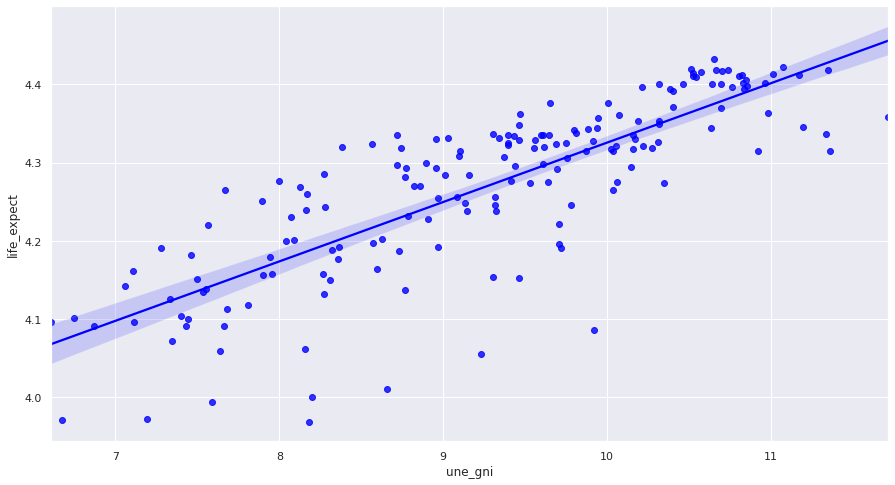

In [74]:
fig, ax = plt.subplots(figsize=(15,8))
sns.regplot(x=temp_df['une_gni'],y=temp_df['life_expect'], color = 'blue', ax = ax)
plt.show()

#### Phương trình hồi quy biểu diễn mỗi quan hệ giữa gni đầu người  và life expectancy

In [75]:
Y = temp_df['life_expect']
X = temp_df['une_gni']
X = sm.add_constant(X)
result = sm.OLS(Y, X).fit()
result.params

const      3.566871
une_gni    0.075850
dtype: float64

In [76]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            life_expect   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     333.5
Date:                Sat, 10 Jul 2021   Prob (F-statistic):           2.66e-42
Time:                        01:04:08   Log-Likelihood:                 233.71
No. Observations:                 176   AIC:                            -463.4
Df Residuals:                     174   BIC:                            -457.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5669      0.039     91.886      0.0

**Kết luận:**

- Biến une_gni có ý nghĩa đối với mô hình về mặt thống kê (p-value = 0).
- Mô hình phù hợp khấ tốt với dữ liệu quan sát về mặt thống kê (p-value = 0)
- Biến une_gni có thể giải thích được 65.7% sự thay đổi của biến life_expect.
- Phương trình hồi quy:

          ln(life_expect) 2016 = 3,66 + 0,0759 × ln(une_gni) 2016 ln: logarit tự nhiên

**Theo kết quả của mô hình:**
Phương trình cho chúng ta biết rằng sự gia tăng giá trị logarit tự nhiên của gni per capita trong một năm làm tăng giá trị logarit tự nhiên của life_expect khoảng 7.5%, có nghĩa là mức tăng GNI trên đầu người gần 1102 đô la Mỹ khiến tuổi thọ tăng trung bình 1 tuổi.

_______

**Đối với thuộc tính gghe-d:**
- Chi phí đầu tư của chính phủ dành cho y tế toàn thế giới qua các năm biến động như thế nào?
 + Xem có điều gì biến động lạ qua các năm không? Nếu có, phân tích rõ hơn Chi phí đầu tư của chính phủ dành cho y tế trong năm đó.
- Chi phí đầu tư của chính phủ dành cho y tế trong từng khu vực và mối quan hệ với life expectancy như thế nào?
- Chi phí đầu tư của chính phủ dành cho y tế của các nước như thế nào? 
  + Top 10 quốc gia có tuổi thọ đứng đầu thế giới thì gghe-d đứng ở đâu và tốc độ đầu tư chi phí của chính phủ dành cho y tế hằng năm là bao nhiêu.
- Phân tích mối quan hệ tuyến giữa gghe-d và life expectancy.
**Ý nghĩa khi đưa ra câu hỏi:**  Xem mức tỷ lệ đầu tư của chính phủ dành cho y tế có ảnh hưởng và tác động như thế nào đến tuổi thọ. Từ đó, quốc gia muốn tăng tuổi thọ thì mức đầu tư của chính phủ dành cho y tế hằng năm là bao nhiêu?

# Xét thuộc tính gghe-d và xem có mối quan hệ gì đến life expectancy (tuổi thọ trung bình) hay không?

## Chi tiêu y tế toàn thế giới qua các năm biến động như thế nào?

In [77]:
mean_gghe_year = data_df.groupby('year')['gghe-d'].mean()

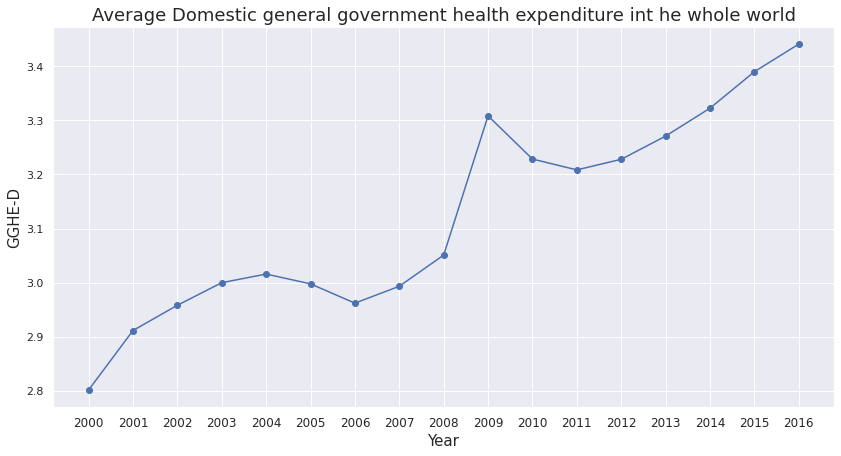

In [78]:
mean_gghe_year.plot.line(marker='o',figsize=(14,7))
plt.xticks(range(mean_gghe_year.index.min(),mean_gghe_year.index.max()+1),size=12)
plt.xlabel('Year',size=15)
plt.ylabel('GGHE-D',size=15)
plt.title('Average Domestic general government health expenditure int he whole world',size=18)
plt.show()

**Nhận xét:**
- Nhìn chung thì qua các năm, tỉ lệ đầu tư của chính phủ cho y tế đang có xu hướng tăng. Từ mức đầu tư 2.8% vào năm 2000 đã tăng lên 3.45% vào năm 2016.
- Có một chút biến động vào giai đoạn 2004 - 2006, tỉ lệ đầu tư của chính phủ cho y tế giảm, thấp nhất là 2.96% vụ năm 2006, sau đó trở về trạng thái ban đầu vào năm 2007 và nhìn chung thì tiếp tục tăng vào các năm tiếp theo.
- Đáng chú ý giai đoạn 2008 - 2009, tỉ lệ đầu tư của chính phú cho y tế tăng một cách đột biến từ 3% lên 3.3%. Trái ngược với sự giảm mạnh của gni đầu người vào giai đoạn đó. Điều đó cho thấy, giai đoạn này thế giới đang gặp phải vấn đề gì đó mà dẫn đến gni đầu người lại giảm mạnh nhưng chi viện của chính phủ cho y tế lại rất nhiều. Theo tôi nghĩ, chắc do dịch bệnh.
- Khi phân tích nguyên nhân giảm gni đầu người năm 2008-2009 thì cho ta thấy tốc độ tăng trưởng tuổi thọ năm 2009 vẫn dương dù gni đầu người giảm. Theo tôi nghĩ, rốc độ tăng trưởng tuổi thọ dương ở đây cũng có phần đầu tư rất lớn của chính phủ dành cho y tế trong năm đó.
- Ta có thể rút ra được rằng, gni đầu người có tác động đến tuổi thọ nhưng còn nhiều yếu tố khác cũng tác động đến tuổi thọ và điển hình ở đây là chi phí dành cho y tế của chính phủ.

## Xem GGHE-D của các nước như thế nào và có mối liên quan nào với life expectancy ko?

In [79]:
gghe_coutnry_df = data_df[~data_df['gghe-d'].isna()]
gghe_country = gghe_coutnry_df.groupby('country').agg({'gghe-d':'mean'}).rename(columns={'gghe-d':'mean_gghe'})
gghe_country = gghe_country.sort_values(by='mean_gghe', ascending = False)
gghe_country['Rank GGHE-D'] = np.arange(1,gghe_country.shape[0]+1)
gghe_country

,mean_gghe,Rank GGHE-D
country,,
Kiribati,9.254519,1
Cuba,8.496848,2
France,8.281034,3
Germany,8.026647,4
Denmark,8.014782,5
...,...,...
Afghanistan,0.487474,175
Guinea,0.401704,176
Myanmar,0.367729,177


**Nhận xét:**
- Cuba, France, Germany, Đan Mạch UAE là những quốc gia theo sau Kiribati trong chỉ số này.
- Afghanistan, Guinea, Myanmar, Congo là những quốc gia có tỉ lệ của chính phủ dành cho y tế thấp nhất.
- Sự chêch lệch giữa top 10 quốc gia đứng đầu và 10 quốc gia thấp nhất  là rất lớn gấp 30 lần.

### Top 10 quốc gia có tuổi thọ trung bình đứng đầu thế giới, tỉ lệ chi tiêu của chính phủ dành cho y tế trên đầu người hàng năm là bao nhiêu?

In [80]:
name_country = top_10_expectancy['country'].tolist()
top_10_life_expectancy_gghe = gghe_country.loc[name_country]
top_10_life_expectancy_gghe

,mean_gghe,Rank GGHE-D
country,,
Japan,7.346999,8
Switzerland,3.299629,65
Australia,5.713366,24
Iceland,7.090096,13
Italy,6.473271,16
Spain,5.919963,22
Sweden,7.615721,6
Singapore,1.290866,147
Canada,7.154623,12


In [81]:
top_10_life_expectancy_gghe['mean_gghe'].describe()

count    10.000000
mean      6.018557
std       2.158358
min       1.290866
25%       5.765015
50%       6.781684
75%       7.298905
max       8.281034
Name: mean_gghe, dtype: float64

**Nhận xét:** 
- Hầu hết 10 quốc gia có tuổi thọ trung bình đứng đầu thế giới ngoại trừ (Thụy sĩ và Singapore) đều có mức đầu tư của chính phủ dành cho y tế cao trên đầu người cao khoảng 6.5%  và nằm trong top 30 của thế giới.

### Phân tích 2 quốc gia Thụy Sĩ và Singapore

In [82]:
thuysi_sigapore_df = data_df[data_df['country'].isin(['Switzerland','Singapore'])].loc[:,['country','life_expect','gghe-d']]
thuysi_df = thuysi_sigapore_df[thuysi_sigapore_df['country']=='Switzerland']
sigapore_df = thuysi_sigapore_df[thuysi_sigapore_df['country']=='Singapore']

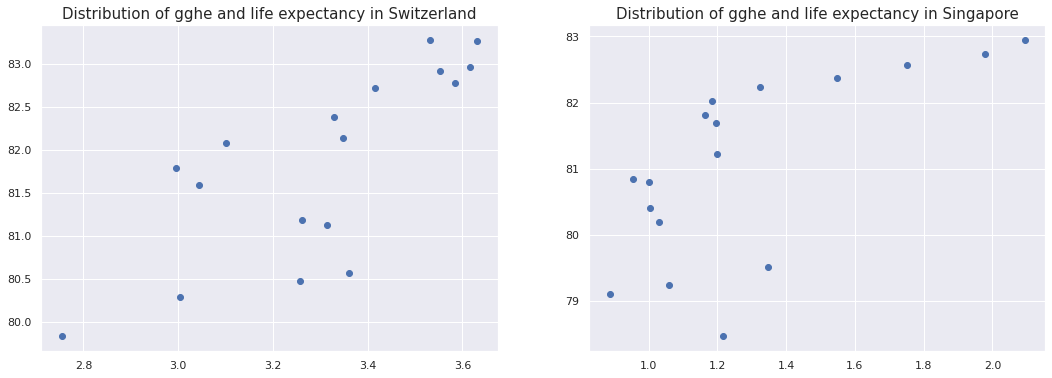

In [83]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(18, 6)
ax[0].scatter(thuysi_df['gghe-d'],thuysi_df['life_expect'])
ax[0].set_title('Distribution of gghe and life expectancy in Switzerland',size=15)
ax[1].scatter(sigapore_df['gghe-d'],sigapore_df['life_expect'])
ax[1].set_title('Distribution of gghe and life expectancy in Singapore',size=15)
plt.show()

**Nhận xét:**
- Dễ dàng nhận thấy rằng 2 thuộc tính này có tương quan, liên hệ mật thiết với nhau. Cụ thể là chúng đồng biến. Nghĩa là tỉ lệ đầu tư của chính phủ dành cho y tế tăng thì tuổi thọ cũng tăng.
- Dù tỉ lệ đầu tư của chính phủ dành cho y tế trên đầu người ở 2 quốc gia Thụy Sĩ và Singapore thấp nhưng hơn so với các quốc gia khác nhưng tuổi thọ vẫn cao. Theo tôi nghĩ, do cơ địa, sức đề kháng tốt nên không còn đầu tư quá nhiều vào y tế.

## Phân tích số liệu giữa gghe-d với life expectancy

In [84]:
temp1_df = data_df.copy()
temp1_df = temp1_df[temp1_df['year']==2016]
temp1_df['life_expect'] = np.log(temp1_df['life_expect'])
temp1_df = temp1_df[~temp1_df['gghe-d'].isna()]

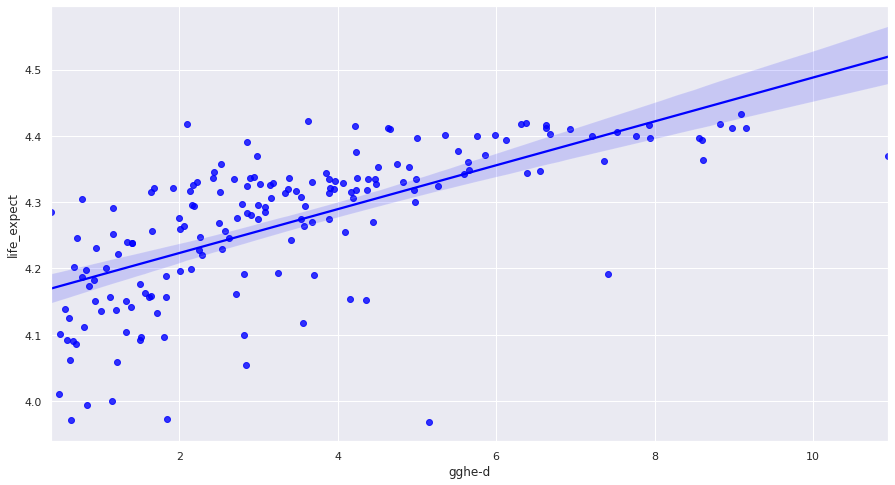

In [85]:
fig, ax = plt.subplots(figsize=(15,8))
sns.regplot(x=temp1_df['gghe-d'],y=temp1_df['life_expect'], color = 'blue', ax = ax)
plt.show()

### Phương trình hồi quy biểu diễn mối quan hệ giữa gghe-d và life expectancy

In [86]:
Y = temp1_df['life_expect']
X = temp1_df['gghe-d']
X = sm.add_constant(X)
result = sm.OLS(Y, X).fit()
result.params

const     4.157171
gghe-d    0.033079
dtype: float64

In [87]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            life_expect   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     142.4
Date:                Sat, 10 Jul 2021   Prob (F-statistic):           2.28e-24
Time:                        01:04:09   Log-Likelihood:                 192.95
No. Observations:                 176   AIC:                            -381.9
Df Residuals:                     174   BIC:                            -375.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1572      0.011    366.686      0.0

**Kết luận:**

- Biến gghe-d có ý nghĩa đối với mô hình về mặt thống kê (p-value = 0).
- Mô hình phù hợp khá tốt với dữ liệu quan sát về mặt thống kê (p-value = 0)
- Biến gghe-d có thể giải thích được 45% sự thay đổi của biến life_expect.
- Phương trình hồi quy:

          ln(life_expect) 2016 = 4.1572 + 0,0331 × gghe-d 2016 ln: logarit tự nhiên

**Theo kết quả của mô hình:**
Phương trình cho chúng ta biết rằng sự gia tăng giá trị của gghe-d trong một năm làm tăng giá trị logarit tự nhiên của life_expect khoảng 3.31%, có nghĩa là mức tăng gghe-d trên đầu người gần 0.4% khiến tuổi thọ tăng trung bình 1 tuổi.

# Biểu diễn mối quan hệ tuyến tính bội giữa life expectancy và (gghe-d, gni đầu người)

In [88]:
temp_df = temp_df[~temp_df['gghe-d'].isna()]
Y = temp_df['life_expect']
X = temp_df[['une_gni','gghe-d']]
X = sm.add_constant(X)
result = sm.OLS(Y, X).fit()
result.params

const      3.676810
une_gni    0.058613
gghe-d     0.014645
dtype: float64

In [89]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            life_expect   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     197.3
Date:                Sat, 10 Jul 2021   Prob (F-statistic):           6.29e-45
Time:                        01:04:09   Log-Likelihood:                 240.13
No. Observations:                 172   AIC:                            -474.3
Df Residuals:                     169   BIC:                            -464.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6768      0.042     87.633      0.0

**Kết luận:**
- Mô hình hồi quy phù hợp như sau:

  `ln(life_expect) 2016 = 3.6768 + 0,0586 × ln(une-gni) + 0.0146 * gghe-d 2016 ln: logarit tự nhiên`

- Việc giải thích các hệ số hồi quy này như sau:

 + 0,0586 là hệ số hồi quy từng phần của giá trị logarit tự nhiên cho thấy với ảnh hưởng của gghe-d được giữ nguyên không đổi, khi logarit tự nhiên của une-gni tăng 1 đơn vị, logarit tuổi thọ trung bình tăng 0.0586 đơn vị. 
 + 0,0146 là hệ số hồi quy từng phần của giá trị logarit tự nhiên cho thấy với ảnh hưởng của une-gni được giữ nguyên không đổi, khi gghe-d tăng 1 đơn vị, logarit tuổi thọ trung bình tăng 0.0146 đơn vị. 
 
 

# Đưa ra câu hỏi cần trả lời - Câu hỏi 3
**Câu hỏi 3: Số tiền đầu tư cho lĩnh vực y tế có quan hệ như thế nào đến tỷ lệ trẻ em dưới 1 tuổi được tiêm phòng vắc-xin ở các nhóm thu nhập quốc dân khác nhau?**

**Trả lời được câu hỏi này** giúp nhóm phần nào hiểu được tác động của riêng sự đầu tư của chính quyền các quốc gia vào lĩnh vực y tế đối với tỷ lệ tiêm vắc xin phòng bệnh của các quốc gia như thế nào.

**Nhìn tổng quát:**
- Trung bình tỷ lệ trẻ em dưới 1 tuổi được tiêm phòng ở các khu vực thay đổi như thế nào.
- Tỷ lệ tử vong của trẻ em dưới 1 tuổi ở các khu vực vào năm 2000 so với 2016 khác nhau thế nào?

**Các bước thực hiện:**
1. Tính trung bình thu nhập quốc dân các quốc gia trong giai đoạn trên:
2. Chia nhóm thu nhập quốc dân cho các quốc gia:
3. Tạo DataFrame gồm các cột cần sử dụng:
4. Thể hiện quan hệ giữa tỷ lệ %GDP đầu tư công cho lĩnh vực y tế lần lượt so với các tỷ lệ tiêm phòng bệnh viêm gan B, sởi, bại liệt và nhóm bạch hầu, uốn ván và ho gà cho từng nhóm thu nhập quốc dân.
    


## Trung bình tỷ lệ trẻ em dưới 1 tuổi được tiêm phòng ở các khu vực thay đổi như thế nào?

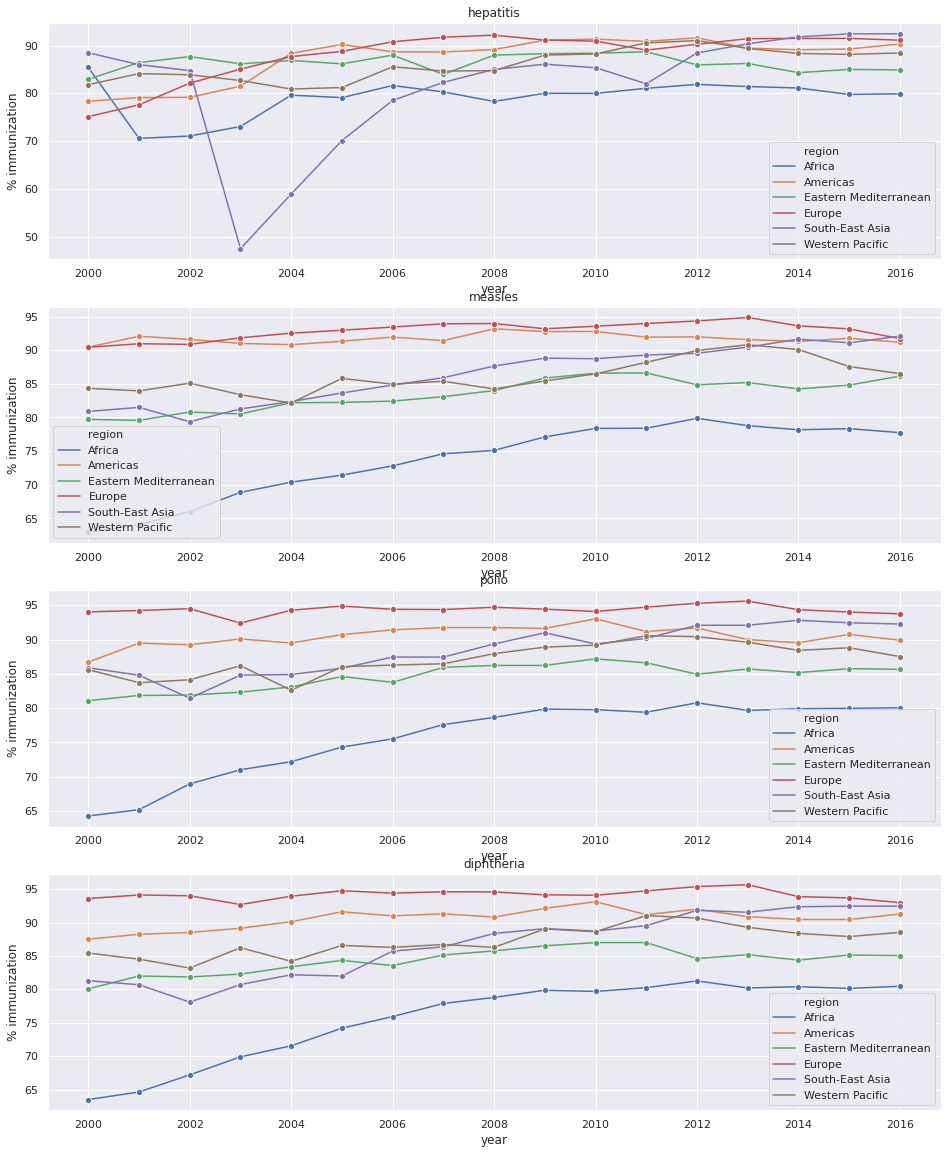

In [90]:
cols = data_df.columns[13:17]
regions = data_df.region.unique()
nrows = cols.size

fig, axes = plt.subplots(nrows, figsize=(16, 20))
for i, col in enumerate(cols):
    sns.lineplot(data=data_df, x='year', y=col, hue='region',
                  ax=axes[i], marker='o', ci=None)
        
    axes[i].set_title(col)
    axes[i].set_ylabel('% immunization')
fig.show()

**Nhận xét:**
- Nhìn chung tỷ lệ tiêm phòng bệnh viêm gan B, sởi, bại liệt, bạch hầu, uốn ván và ho gà ở các khu vực đều tăng trong giai đoạn 2000 - 2016
- Châu Phi là khu vục có xuất phát điểm khá thấp, ngoại trừ viêm gan B thì những bệnh khác đều có tỷ lệ tiêm phòng ~65% vào năm 2000. Tuy nhiên qua các năm cũng thấy được sự cải thiện rõ ràng.
- Khu vực châu Âu và châu Mỹ có tỉ lệ tiêm phòng được duy trì ổn định ở mức cao.

## Tỷ lệ tử vong của trẻ em dưới 1 tuổi ở các khu vực vào năm 2000 so với 2016 khác nhau thế nào?

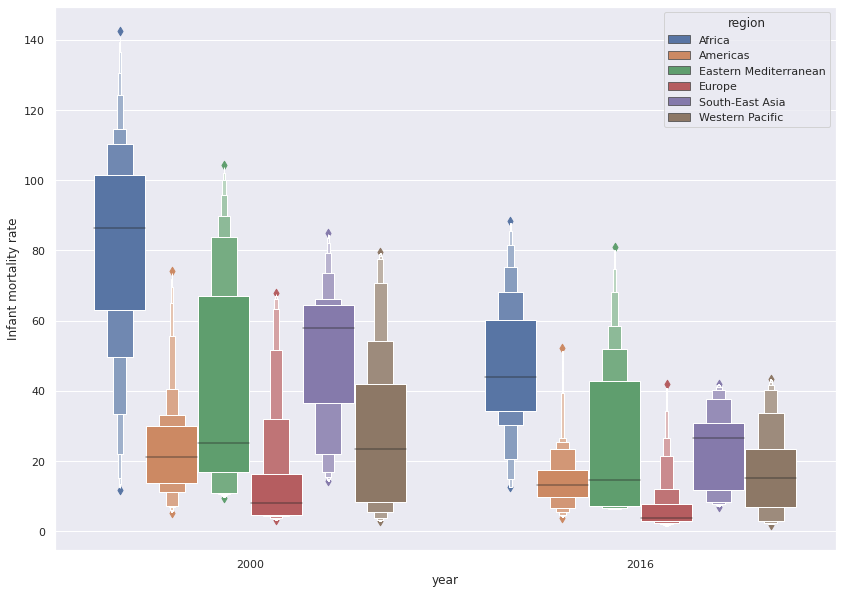

In [125]:
df = data_df.loc[(data_df.year == 2000) | (data_df.year == 2016), ['region', 'year', 'une_infant']]
fig, ax = plt.subplots(figsize=(14, 10))
sns.boxenplot(data=df, x='year', y='une_infant', hue='region', ax=ax)
ax.set_ylabel('Infant mortality rate')
fig.show()

**Nhận xét:**
- Các quốc gia đều có tỷ lệ trẻ em tử vong cải thiện hơn ở năm 2016 so với năm 2000.
- Châu Phi vẫn là khu vực có tỷ lệ tử vong cao nhất trong giai đoạn 2000 - 2016. 
- So với năm 2000, phân bố tỷ lệ tử vong ở năm 2016 của châu Phi đã chuyển từ xiên trái sang xiên phải, các khu vực khác vẫn giữ nguyên.

## Tính trung bình thu nhập quốc dân các quốc gia trong giai đoạn trên.
- Lấy cột "country_code", "une_gni".
- Gom nhóm theo cột "country_code".
- Tính trung bình "une_gni" cho từng nhóm.

In [92]:
country_gni = data_df[['country_code', 'une_gni']].groupby('country_code').mean()
country_gni

,une_gni
country_code,
AFG,1763.750000
AGO,4911.176471
ALB,8070.000000
ARE,72211.176471
ARG,15750.588235
...,...
WSM,5017.333333
YEM,3501.176471
ZAF,10616.470588


## Chia nhóm thu nhập quốc dân cho các quốc gia theo các phân vị.

| Nhóm thu nhập | Khoảng phân vị |
| :-----------: | :------------: |
| Thấp | 0 - 25th |
| Trung bình thấp | 25th - 50th |
| Trung bình cao | 50th - 75th |
| Cao | 75th - 100th |

In [93]:
labels = ['low', 'lower middle', 'upper middle', 'high']
gni_groups = pd.qcut(country_gni.une_gni, 4, labels, duplicates='drop')
gni_groups

country_code
AFG             low
AGO    lower middle
ALB    lower middle
ARE            high
ARG    upper middle
           ...     
WSM    lower middle
YEM    lower middle
ZAF    upper middle
ZMB             low
ZWE             low
Name: une_gni, Length: 183, dtype: category
Categories (4, object): [low < lower middle < upper middle < high]

## Tạo DataFrame gồm các cột cần sử dụng.
- Truy xuất các cột: "country_code", "year", "hepatitis", "measles", "polio", "diphtheria", "gghe-d" từ DataFrame `data_df`.
- Ghép Series chứa thông tin nhóm thu nhập các quốc gia vào DataFrame trên.

In [94]:
immunization_gghe_df = data_df.iloc[:, [1, 3] + list(range(13, 17)) + [21]]
immunization_gghe_df = immunization_gghe_df.join(gni_groups, 'country_code')
immunization_gghe_df

,country_code,year,hepatitis,measles,polio,diphtheria,gghe-d,une_gni
0,AGO,2000,NaN,32.0,21.0,31.0,1.11099,lower middle
1,AGO,2001,NaN,60.0,28.0,42.0,2.04631,lower middle
2,AGO,2002,NaN,59.0,22.0,47.0,1.30863,lower middle
3,AGO,2003,NaN,44.0,21.0,46.0,1.46560,lower middle
4,AGO,2004,NaN,43.0,18.0,47.0,1.68663,lower middle
...,...,...,...,...,...,...,...,...
3105,LAO,2012,79.0,72.0,78.0,79.0,0.43670,lower middle
3106,LAO,2013,87.0,82.0,86.0,87.0,0.71266,lower middle
3107,LAO,2014,88.0,87.0,88.0,88.0,0.68373,lower middle
3108,LAO,2015,81.0,83.0,80.0,81.0,0.86391,lower middle


In [95]:
immunization_cols = immunization_gghe_df.columns[2:6]

## Thể hiện quan hệ giữa tỷ lệ %GDP đầu tư công cho lĩnh vực y tế lần lượt so với các tỷ lệ tiêm phòng bệnh viêm gan B, sởi, bại liệt và nhóm bạch hầu, uốn ván và ho gà cho từng nhóm thu nhập quốc dân.
- Vẽ biểu đồ phân tán kết hợp với đường hồi quy.

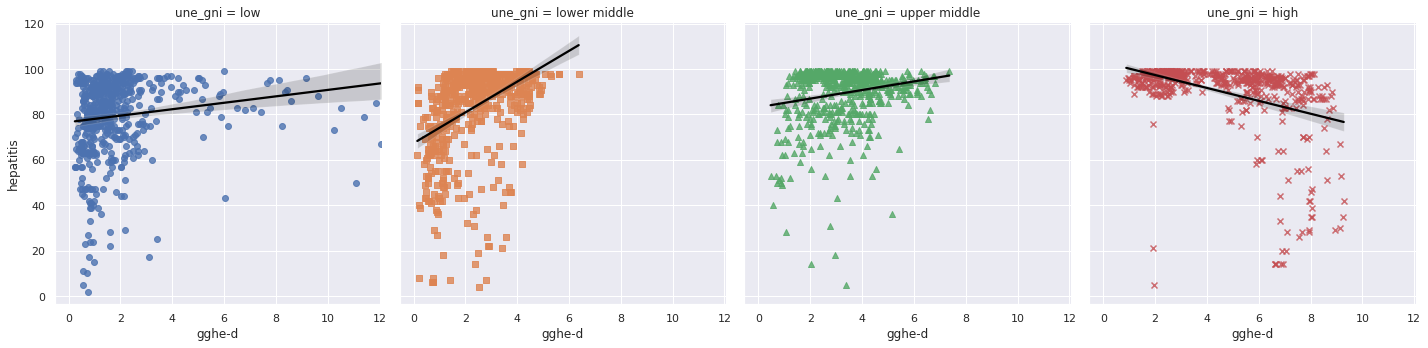

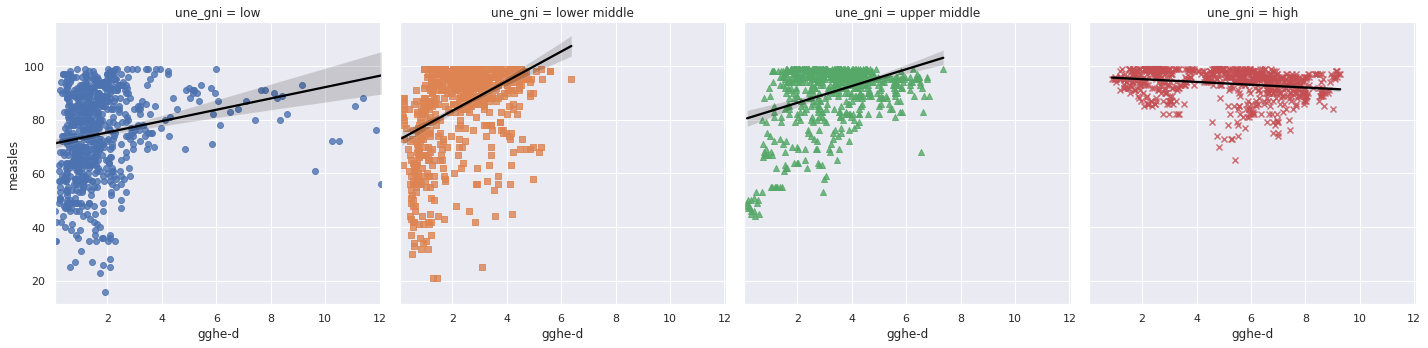

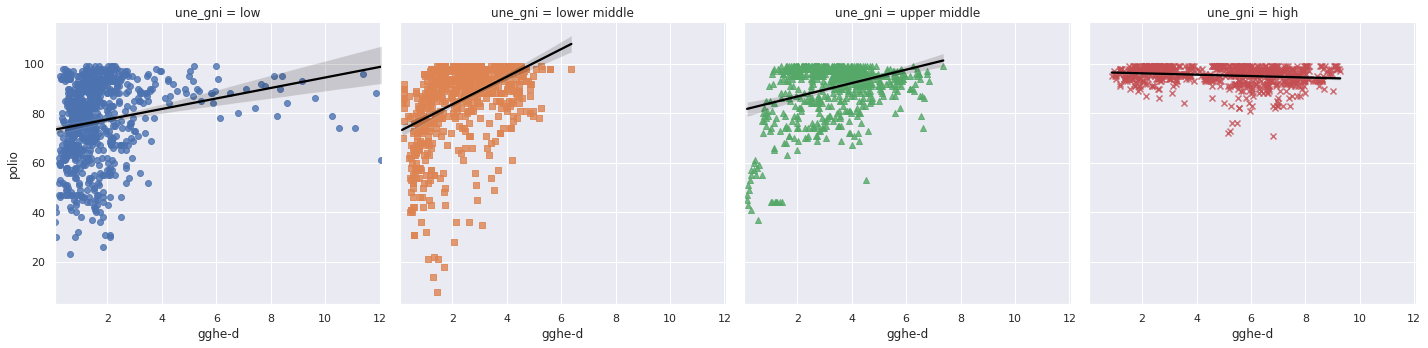

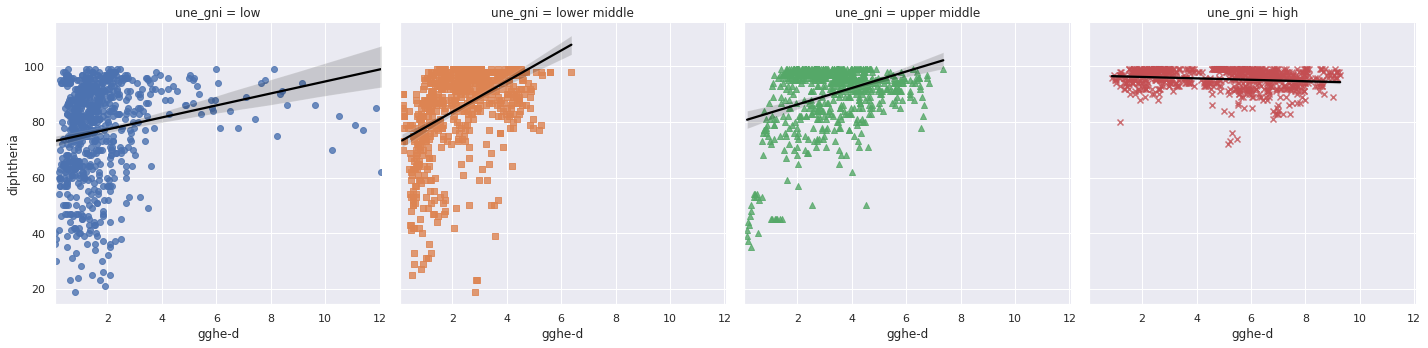

In [96]:
for i, col in enumerate(immunization_cols):
    sns.lmplot(data=immunization_gghe_df, x='gghe-d', y=col, hue='une_gni',
              markers=['o', 's', '^', 'x'], col='une_gni', line_kws={'color': 'black'})
plt.show()

- Sử dụng `statsmodels` để tính công thức hồi quy và các thông tin khác như "hệ số xác định - R-squared", "p-value". Tạo DataFrame lưu kết quả trên.
    - Tạo DataFrame lưu các phương trình hồi quy.
        - Duyệt qua từng nhóm thu nhập quốc dân và từng cột thông tin tiêm phòng để tìm phương trình hồi quy. Các phương trình có công thức: $immunization = intercept + slope \times gni$
        - Lưu kết quả tính được và các cặp (loại vắc-xin, nhóm thu nhập).
        - Tạo DataFrame với:
            - index: MultiIndex gồm tầng 0 là loại vắc-xin, tầng 1 là nhóm thu nhập.
            - Mỗi cột là một thuộc tính của kết quả tìm công thức hồi quy.
  

In [97]:
regress_result = []
indices = []
for col in immunization_cols:
    df = immunization_gghe_df[[col, 'gghe-d', 'une_gni']].dropna()
    for label in labels:
        indices.append((col, label))
        xy_df = df[df['une_gni'] == label]
        regress_result.append(sm.OLS(xy_df[col], sm.add_constant(xy_df['gghe-d'])).fit())

regress_series = []
for i in range(len(regress_result)):
    regress_series.append(regress_result[i].params)
    regress_series[i]['rsquared'] = regress_result[i].rsquared
    regress_series[i]['pvalue'] = regress_result[i].pvalues[1]
    
regress_result_df = pd.DataFrame(regress_series, index=pd.MultiIndex.from_tuples(indices, names=('immunization', 'gni group')))
regress_result_df.rename(columns={'const':'intercept','gghe-d':'slope'})

intercept     slope  rsquared        pvalue
immunization gni group                                                 
hepatitis    low            76.653480  1.418151  0.020015  7.535364e-04
             lower middle   67.349313  6.780702  0.166840  3.964095e-28
             upper middle   83.209062  1.893767  0.039927  2.220022e-07
             high          103.063457 -2.840588  0.161754  5.926980e-23
measles      low            71.054390  2.108941  0.042170  1.933741e-08
             lower middle   72.286546  5.520377  0.168712  1.196836e-31
             upper middle   80.032944  3.128272  0.143166  3.398910e-26
             high           96.174843 -0.521488  0.047574  1.358176e-09
polio        low            73.261105  2.119943  0.042763  1.531348e-08
             lower middle   72.427261  5.582231  0.176691  3.267473e-33
             upper middle   81.354863  2.710360  0.113671  8.240460e-21
             high           96.714378 -0.280448  0.025836  8.950375e-06
diphtheria   low            73.000543  2.158674  0.038883  7.052936e-08
             lower middle   72.511196  5.538332  0.181396  3.846700e-34
             upper middle   80.349686  2.967127  0.125494  5.996558e-23
             high           96.729421 -0.256737  0.023682  2.141734e-05

**Nhận xét:**
- Nhìn chung, ngoại trừ nhóm quốc gia có thu nhập cao, các quốc gia khác đều cho thấy việc tăng đầu tư cho lĩnh vực y tế có thể dẫn đến tăng tỷ lệ tiêm phòng cho trẻ em dưới 1 tuổi.
- Biến "gghe-d" trong các công thức hồi quy đều có ý nghĩa về mặt thống kê (p-value < 0.05) nhưng chỉ giải thích được khoảng 2 - 18% sự thay đổi của tỷ lệ tiêm các loại vắc-xin ở các nhóm thu nhập quốc dân khác nhau, cho thấy chỉ riêng sự đầu tư của chính phủ là không đủ để giải thích toàn bộ sự thay đổi trong tỷ lệ tiêm phòng. Đa số các mô hình hồi quy gần như không thể giải thích sự thay đổi của tỷ lệ tiêm phòng khi chỉ có mức đầu tư.
- Nhóm thu nhập quốc dân mức cao là nhóm quốc gia có tỷ lệ tiêm phòng cao nhất với tỷ lệ từ 80 - 100% ở tất cả loại vắc-xin. Với nhóm này có thể do đã có tỷ lệ tiêm phòng tốt từ năm 2000 nên việc thay đồi mức đầu tư vào y tế gần như không dẫn đến thay đổi nào của tỷ lệ tiêm phòng, chủ yếu là để duy trì số liệu tốt trong giai đoạn 2000 - 2016.
- Nhóm quốc gia thu nhập thấp đa số đầu tư từ 2 - 4% GDP cho lĩnh vực y tế. Khoảng đầu tư này có nhiều quốc gia thuộc nhóm đạt tỷ lệ 80 - 100% tiêm phòng, cho thấy có thể chương trình tiêm phòng là ưu tiên rất cao của các quốc gia trên, hay ngoài đầu tư của chính phủ còn có những yếu tố khác làm tăng tỷ lệ như sự trợ giúp từ các tổ chức quốc tế, các quốc gia có thu nhập cao hơn, ...
- Ảnh hưởng của riêng yếu tố đầu tư chính phủ có vẻ có ảnh hưởng lớn nhất ở các quốc gia thuộc nhóm thu nhập quốc dân trung bình thấp khi chỉ yếu tố đầu tư chính phủ đã có thể giải thích từ 15 - 18% thay đổi tỷ lệ tiêm phòng.
- Nhóm thu nhập thấp và cao nhất có một số điểm chú ý khi có quốc gia chi dến 10 - 12 %GDP cho lĩnh vực y tế nhưng tỷ lệ tiêm phòng khá thấp so với các nước cùng nhóm.

# Đưa ra câu hỏi cần trả lờ - Câu hỏi 4

**Câu hỏi đặt ra là:** Sự thay đổi qua từng năm ở các yếu tố:
- Tỷ lệ tử vong ở người trưởng thành - adult_mortality.
- Lượng cồn nguyên chất tiêu thụ - alcohol.
- Chỉ số khối cơ thể trung bình - bmi.
- Tỷ lệ người 5 - 19 tuổi bị thiếu cân - age5-19thinness.
- Tỷ lệ người 5 - 19 tuổi bị béo phì - age5-19obesity.

của các khu vực trên thế giới là như thế nào? Tỷ lệ tử vong ở người trưởng thành có thể được giải thích bởi các yếu tố còn lại không?

**Trản lời được câu hỏi này** giúp nhóm phần nào nhìn kĩ hơn tình trạng sức khỏe của những người dân độ tuổi vị thành niên và độ tuổi lao dộng ở các quốc gia thuộc những khu vực khác nhau, cũng như tình trạng sử dụng đồ uống có cồn và có thể là những nguy cơ về thiếu/thừa cân.

**Các bước thực hiện:**
1. Truy xuất các cột đã liệt kê và cột "region", "year" để gom nhóm dữ liệu và biểu diễn theo từng năm.
2. Tính sự thay đổi qua từng năm của các yếu tố trên.
3. Thống kê mô tả và trực quan một số dữ liệu.
4. Tìm mô hình giải thích tỷ lệ tử vong ở người trưởng thành bởi những yếu tố khác, nếu có.



## **Bước 1:** Truy xuất các cột đã liệt kê và cột "region", "year" để gom nhóm dữ liệu và biểu diễn theo từng năm.

In [98]:
mature_pop_attr_df = data_df.iloc[:, [0, 1, 2, 3, 6, 9, 10, 11, 12, 26]]
mature_pop_attr_df

,country,country_code,region,year,adult_mortality,alcohol,bmi,age5-19thinness,age5-19obesity,une_hiv
0,Angola,AGO,Africa,2000,383.5583,1.47439,21.7,11.0,0.5,1.0
1,Angola,AGO,Africa,2001,372.3876,1.94025,21.8,10.9,0.5,1.1
2,Angola,AGO,Africa,2002,354.5147,2.07512,21.9,10.7,0.6,1.2
3,Angola,AGO,Africa,2003,343.2169,2.20275,22.0,10.5,0.7,1.3
4,Angola,AGO,Africa,2004,333.8711,2.41274,22.2,10.3,0.8,1.3
...,...,...,...,...,...,...,...,...,...,...
3105,Lao People's Democratic Republic,LAO,Western Pacific,2012,209.2666,6.29833,22.4,9.2,3.1,0.3
3106,Lao People's Democratic Republic,LAO,Western Pacific,2013,205.1459,6.42186,22.6,9.1,3.5,0.3
3107,Lao People's Democratic Republic,LAO,Western Pacific,2014,200.8204,6.64447,22.7,9.0,3.8,0.3
3108,Lao People's Democratic Republic,LAO,Western Pacific,2015,196.6613,6.83826,22.8,8.9,4.2,0.3


## **Bước 2:** Tính sự thay đổi qua từng năm của các yếu tố trên.
- Gom nhóm dữ liệu truy xuất từ bước 1 theo cột "region" và "year" và tính trung bình.
- Tiếp tục gom nhóm theo cột "region" và tính chênh lệch các số liệu của năm sau so với năm trước tại các nhóm.
- Xóa các dòng có giá trị thiếu.
- Đặt lại cột chỉ số,  cột "region" và "year" thành cột thường.

In [99]:
mature_pop_attr_diff = mature_pop_attr_df.iloc[:, [1, 4, 5, 6, 7, 8, 9]]
mature_pop_attr_diff = mature_pop_attr_diff.groupby('country_code').diff()
mature_pop_attr_diff.dropna(inplace=True)
mature_pop_attr_diff = mature_pop_attr_diff.join(mature_pop_attr_df.iloc[:, :4])
mature_pop_attr_diff

,adult_mortality,alcohol,bmi,age5-19thinness,age5-19obesity,une_hiv,country,country_code,region,year
1,-11.1707,0.46586,0.1,-0.1,0.0,0.1,Angola,AGO,Africa,2001
2,-17.8729,0.13487,0.1,-0.2,0.1,0.1,Angola,AGO,Africa,2002
3,-11.2978,0.12763,0.1,-0.2,0.1,0.1,Angola,AGO,Africa,2003
4,-9.3458,0.20999,0.2,-0.2,0.1,0.0,Angola,AGO,Africa,2004
5,-11.1634,1.07366,0.1,-0.1,0.0,0.1,Angola,AGO,Africa,2005
...,...,...,...,...,...,...,...,...,...,...
3105,-4.6248,0.03829,0.1,-0.2,0.3,0.0,Lao People's Democratic Republic,LAO,Western Pacific,2012
3106,-4.1207,0.12353,0.2,-0.1,0.4,0.0,Lao People's Democratic Republic,LAO,Western Pacific,2013
3107,-4.3255,0.22261,0.1,-0.1,0.3,0.0,Lao People's Democratic Republic,LAO,Western Pacific,2014
3108,-4.1591,0.19379,0.1,-0.1,0.4,0.0,Lao People's Democratic Republic,LAO,Western Pacific,2015


## **Bước 3:** Thống kê mô tả và hiện thị 1 số dữ liệu.

Thống kê mô tả

In [100]:
mature_pop_attr_diff.describe()

,adult_mortality,alcohol,bmi,age5-19thinness,age5-19obesity,une_hiv,year
count,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000
mean,-3.976994,-0.003694,0.077798,-0.090872,0.232064,-0.016147,2008.553211
std,11.421527,0.499443,0.050900,0.125333,0.150521,0.123532,4.606739
min,-252.595600,-3.867210,-0.100000,-1.000000,-0.100000,-1.300000,2001.000000
25%,-5.509925,-0.104075,0.000000,-0.100000,0.100000,0.000000,2005.000000
50%,-2.525190,0.000555,0.100000,-0.100000,0.200000,0.000000,2009.000000
75%,-0.834950,0.104137,0.100000,0.000000,0.300000,0.000000,2013.000000
max,136.128800,5.086600,0.200000,0.200000,1.100000,1.200000,2016.000000


**Nhận xét:**
- Chỉ số khối cơ thể trung bình cũng như là các tỷ lệ về người trẻ bị thiếu/thừa cân và tỷ lê người nhiễm HIV không có sự tăng/giảm quá lớn nào ở các quốc gia trong giai đoạn 2000 - 2016, cho thấy những vấn đề trên không có sự mất kiểm soát.
- Lượng đồ uống có cồn tiêu thụ trên đầu người có sự thay đổi lớn hơn cho thấy có quốc gia đã áp dụng các biện pháp siết chặt quản lý làm cho lượng tiêu thụ giảm mạnh, ngược lại cũng có nơi việc quản lý buông lỏng, phần nào khuyến khích người dân sử dụng rượu bia.
- Tỷ lệ tử vong ở người trưởng thành cũng có những biến động lớn, đặc biệt với mức giảm và tăng khá cao ở mức ~420/1000 người, cho thấy có thể đã xảy ra sự việc nghiêm trọng.

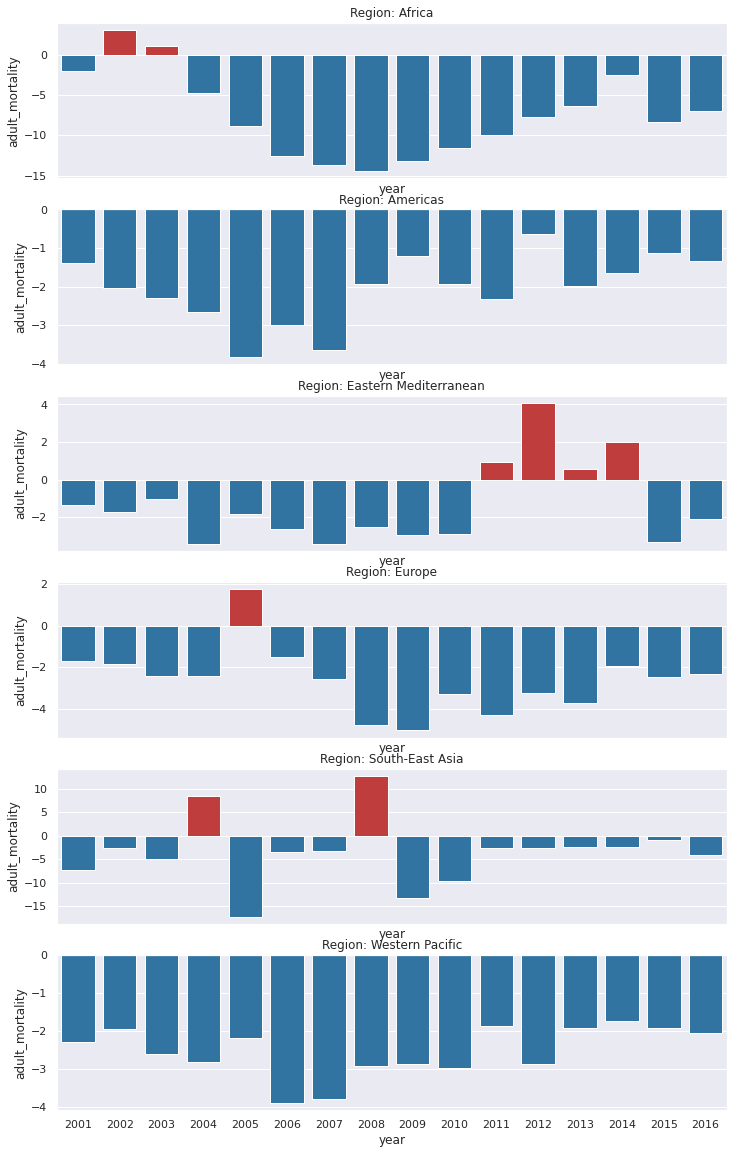

In [101]:
regions = mature_pop_attr_diff.region.unique()
fig, axes = plt.subplots(regions.size, figsize=(12, 20), sharex=True)
for i, region in enumerate(regions):
    df = mature_pop_attr_diff[mature_pop_attr_diff.region == region]
    df = df.groupby('year').mean().reset_index()
    custom_palette = np.where(df.adult_mortality > 0, 'tab:red', 'tab:blue')
    sns.barplot(x='year', y='adult_mortality', data=df,
               palette=custom_palette, ax=axes[i])
    
    axes[i].set_title(f'Region: {region}')
    
fig.show()

**Nhận xét:**
- Khu vực Tây Thái Bình Dương không ghi nhận trường hợp tăng tỷ lệ tử vong nào trong giai đoạn 2000 - 2016, phần nào cho thấy sự cải thiện về sức khỏe của người dân ở độ tuổi trưởng thành.
- Khu vực Đông Địa Trung Hải có 4 năm liên tiếp tăng tỷ lệ tử vong ở người trưởng thành với mức 1 - 4%, có thể có sự kiện nghiêm trọng kéo dài trong khu vực này.

In [102]:
plt.close('all')

- Tỷ lệ tử vong ở người trưởng thành có thể được giải thích bởi các yếu tố theo công thức nào?

In [126]:
y = mature_pop_attr_df.adult_mortality
X = mature_pop_attr_df.iloc[:, 5:]
# model = sm.OLS(alcohol_bmi_df.adult_mortality, sm.add_constant(alcohol_bmi_df.iloc[:, 3:-1]), 'drop')
model = sm.OLS(y, sm.add_constant(X), 'drop')
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        adult_mortality   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     1121.
Date:                Sat, 10 Jul 2021   Prob (F-statistic):               0.00
Time:                        01:07:09   Log-Likelihood:                -12981.
No. Observations:                2318   AIC:                         2.597e+04
Df Residuals:                    2312   BIC:                         2.601e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             512.0365     31.874     16.064      0.000     449.531     574.542
alcohol            -2.8681      0.415     -6.909      0.000      -3.682      -2.054
bmi               -11.3284      1.324     -8.556      0.000     -13.925      -8.732
age5-19thinness     0.3478      0.480      0.724      0.469      -0.594       1.290
age5-19obesity     -8.0754      0.581    -13.905      0.000      -9.214      -6.937
une_hiv            15.2501      0.306     49.814      0.000      14.650      15.850
==============================================================================
Omnibus:                       74.845   Durbin-Watson:                   0.177
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.814
Skew:                           0.280   Prob(JB):                     1.30e-27
Kurtosis:                       3.984   Cond. No.                         621.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Nhận xét:**
- Ngoại trừ biến "age5-19thinness", các biến khác đều có ý nghĩa về mặt thống kê với mức ý nghĩa 0.05.
- Mô hình có thể giải thích được 70.3% sự thay đổi của biến "adult_mortality"
- Tỷ lệ người nhiễm HIV là yếu có ảnh hưởng lớn tới sự thay đổi của tỷ lệ tử vong ở người trưởng thành. Khi tăng 1% số người nhiễm HIV thì tỷ lệ tử vong tăng khoảng 15.2/1000.

---
# Nhìn lại quá trình làm đồ án

**Khó khăn:**
 
 *Về cá nhân - Chí Bảo*
 + Khó khăn ở việc chọn dữ liệu, bản thân em chọn 3 tập dữ liệu liên quan đến 3 chủ đề khác nhau nhưng sau khi thảo luận lại với bạn thì không biết đề tài nào thực sự hữu ích để phân tích. Cả 2 ban đầu đều khám dữ liệu về dataset population thì thấy giá trị thiếu rất nhiều, rất khó đảm bảo việc phân tích một cách trực quan và chính xác nhất.
 + Khó khăn trong việc đặt câu hỏi sao cho đảm báo yếu tố hữu ích lẫn độ khó.

 *Về cá nhân - Xuân Quý*
 + Khó khăn ở việc chọn dữ liệu, vì Kaggle là một nguồn dữ liệu lớn, 
Nhóm đã chọn rất nhiều chủ đề khác nhau và đã phân tích 1 tập dataset về population thì thấy giá trị thiếu rất nhiều, rất khó đảm bảo việc phân tích một cách trực quan và chính xác nhất.
 + Khó khăn trong việc đặt câu hỏi sao cho đảm báo yếu tố hữu ích lẫn độ khó.

**Điều hữu ích học được:**
 + Phối hợp làm việc nhóm và thực hiện trên branch github là một công việc thiết thực cho quá trình đi làm sau này.
Học được nhiều cách xử lí dữ liệu trong quá trình thực hiện trả lời câu hỏi.
 + Nắm vững hơn về quy trình khoa học dữ liệu.
**Nếu có thêm thời gian:** nhóm sẽ phân tích chuyên sâu vào từng thuộc tính ảnh hưởng đến tuổi thọ, sử dụng mô hình học máy để dự đoán tuổi thọ trong năm tới dựa vào các thuộc tính còn lại.

---
# Tài liệu tham khảo
- https://stackoverflow.com/questions/45902739/seaborn-annotate-the-linear-regression-equation
- https://pandas.pydata.org/docs/reference/api/pandas.MultiIndex.from_tuples.html#pandas.MultiIndex.from_tuples
- https://matplotlib.org/stable/tutorials/introductory/pyplot.html
- https://seaborn.pydata.org/tutorial.html
- https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6249744/
- https://www.joghr.org/article/12005-exploring-the-relationship-between-life-expectancy-at-birth-and-economic-growth-in-56-developing-countries
- https://www.kaggle.com/mmattson/template-to-generate-the-dataset